# Supervised Learning Regression Project: Cars4U

__Joseph Reves joe.reves@gmail.com__

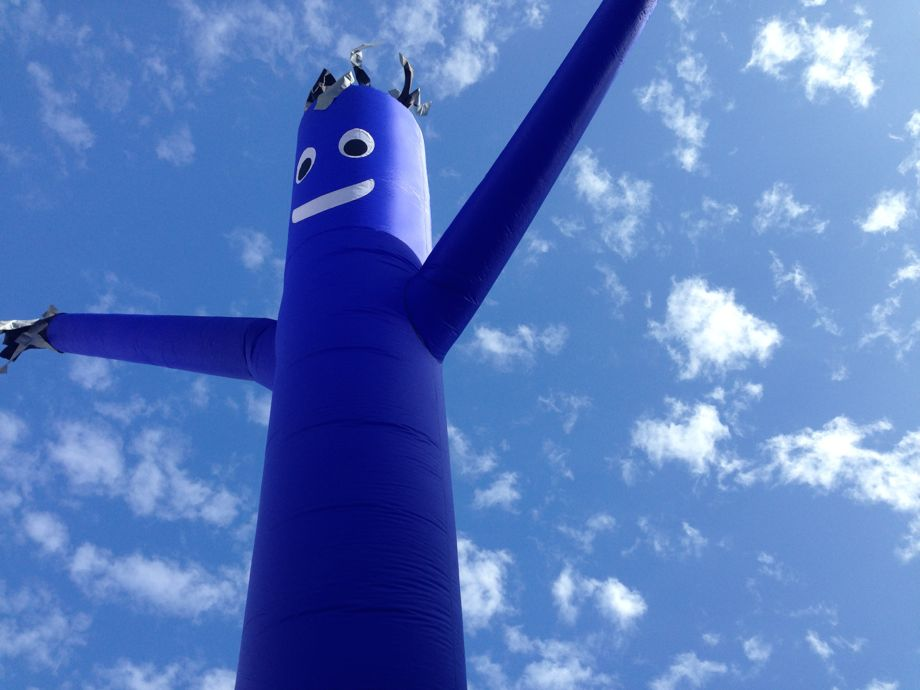

## Context and Objectives:

### Business Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 


### Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

### Key Questions
To prepare a model that we'll use to predict pricing accurately, we'll want to explore the data to generate insights to address these specific questions:
  * How is pricing distributed within our current inventory?
  * How does pricing break down by manufacturer, and be specific model?
  * What's the distribution of the age of our inventory?
  * How "used" are our pre-owned vehicles? What's the distribution of kilometers driven for our inventory?
  * Where is our inventory located throughout India?
  * How does depreciation over time impact our inventory? What models have the highest / lowest depreciation rates?
  * What attributes of our vehicles give us the strongest correlation with pricing?
  
To accomplish this analysis, we'll need to assess the completeness and the integrity of our data, and make adjustments as necessary to improve data quality and usefulness.
  

### Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below. 

**Data Dictionary** 

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner_Type: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs

## Importing necessary libraries

In [1]:
# Code structure
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set()

# Random value generation
import random

# supress warnings
import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Geographic coordinates and mapping libraries
from geopy.geocoders import Nominatim
from shapely.geometry import Point, LineString
import geopandas as gpd
import folium

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

## Loading and copying the dataset

<div class="alert alert-block alert-info">
<b>Dependency:</b> Loading the "used_cars_data.csv" file from the local directory where the notebook is stored. For this project, I'm using Anaconda on my local machine.
</div>

In [2]:
# Reading the used cars dataset with the read_csv function from pandas package
used_cars = pd.read_csv("used_cars_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# Let's make a copy while we explore the data, and potentially make some changes
cars = used_cars.copy()

<IPython.core.display.Javascript object>

## Characterize the available data set, and the completeness of the data

### Sanity Checks

In [4]:
# let's get a shape of the dataset
print(
    "The available data includes",
    cars.shape[0],
    "rows, with",
    cars.shape[1],
    "columns of information",
)

The available data includes 7253 rows, with 14 columns of information


<IPython.core.display.Javascript object>

In [5]:
# Let's have a look at the column headers, and a sample of the rows of information
cars.sample(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5048,5048,Skoda Fabia 1.2 MPI Classic,Pune,2008,61000,Petrol,Manual,Second,17.5 kmpl,1198 CC,70 bhp,5.0,25.83,1.65
1433,1433,Maruti 800 AC,Jaipur,2007,59000,Petrol,Manual,First,16.1 kmpl,796 CC,37 bhp,4.0,7.88,0.75
3211,3211,Tata Manza Club Class Quadrajet90 LS,Coimbatore,2014,54448,Diesel,Manual,First,21.02 kmpl,1248 CC,88.8 bhp,5.0,7.63,3.70
2631,2631,Hyundai Creta 1.6 CRDi SX Option,Coimbatore,2016,11554,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,14.25
6465,6465,Mahindra Bolero VLX CRDe,Coimbatore,2012,72246,Diesel,Manual,First,13.6 kmpl,2523 CC,63 bhp,7.0,11.01,NaN
639,639,Maruti Ignis 1.2 Alpha,Mumbai,2017,7000,Petrol,Manual,First,20.89 kmpl,1197 CC,81.80 bhp,5.0,7.87,5.70
811,811,Honda Mobilio S i DTEC,Chennai,2015,65000,Diesel,Manual,First,24.2 kmpl,1498 CC,98.6 bhp,7.0,13.58,5.50
4192,4192,Hyundai i10 Magna 1.1,Delhi,2013,53213,Petrol,Manual,First,19.81 kmpl,1086 CC,68.05 bhp,5.0,10.25,2.74
7070,7070,Volkswagen Ameo 1.5 TDI Highline,Coimbatore,2017,23389,Diesel,Manual,First,21.66 kmpl,1498 CC,108.62 bhp,5.0,10.13,NaN
4614,4614,BMW X5 X5 M,Chennai,2017,15000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,55.07,70.00


<IPython.core.display.Javascript object>

In [6]:
# Let's have a look at how the data is currently typed by python
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

In [7]:
# check for null values in the data
cars.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# statistically profile the numeric data
cars.describe().applymap("{:,.2f}".format)

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,"7,253.00","7,253.00","7,253.00","7,200.00","7,253.00","6,019.00"
mean,"3,626.00","2,013.37","58,699.06",5.28,21.31,9.48
std,"2,093.91",3.25,"84,427.72",0.81,24.26,11.19
min,0.00,"1,996.00",171.00,0.00,3.91,0.44
25%,"1,813.00","2,011.00","34,000.00",5.00,7.88,3.50
50%,"3,626.00","2,014.00","53,416.00",5.00,11.30,5.64
75%,"5,439.00","2,016.00","73,000.00",5.00,21.69,9.95
max,"7,252.00","2,019.00","6,500,000.00",10.00,375.00,160.00


<IPython.core.display.Javascript object>

In [9]:
# Profile the object data, as well
cars.describe(include=["object"])

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,7253,7253,7253,7253,7253,7251,7207,7078
unique,2041,11,5,2,4,450,150,385
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp
freq,55,949,3852,5204,5952,207,732,280


<IPython.core.display.Javascript object>

In [10]:
# checking for duplicate values in the data
cars.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [11]:
cars["S.No."].duplicated().sum()

0

<IPython.core.display.Javascript object>

`S.No.` is a unique identifier. We have no duplicated records.

__Observations on data sanity checks__

We'll need to transform some of this data into more useful types, and we'll need to handle some of the missing values.

- `S.No.`: This is currently handled as Int64, but is probably more appropriately an object value
- `Name`: We should split out the manufacturer and model, add those columns, and drop `Name`
- `Year`: Useful as-is; we may want to add a column for the rough age of the car in years. Also, a kilometers/year metric
- `Kilometers_Driven`: we have a max value of six million miles.  Maybe Elon's Tesla? We'll investigate and correct
- `Fuel_Type`: Should be a category
- `Transmission`: Should be a category
- `Owner_Type`: We may want to encode this as "number of owners"
- `Mileage`: Needs the units split out from the values
- `Engine`: Needs to split out the units / values
- `Power`: Needs to split out the units / values
- `Seats`: Let's look at whether this is useful as a category. We have a min value of zero; we'll locate and correct that

We have missing values for `Mileage`, `Engine`, `Power`, and `Seats`, as well as `Price`.  We'll look at each of those in the next section.

### Data Transformations

In [12]:
# Recast serial number as an object
cars = cars.astype({"S.No.": object})

<IPython.core.display.Javascript object>

While this is numeric, it's not mathematically useful.  We should treat it like an object 

In [13]:
# Split out the manufacturer and model and add them to the dataset
# Title case them for consistency
cars["Manufacturer"] = cars["Name"].apply(lambda x: x.split(" ")[0].title())
cars["Model"] = cars["Name"].apply(lambda x: x.split(" ")[1].title())

<IPython.core.display.Javascript object>

In [14]:
cars["Manufacturer"].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
Bmw               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
Opelcorsa           1
Name: Manufacturer, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
cars["Model"].value_counts()

Swift      418
City       318
I20        303
Innova     203
Verna      200
          ... 
Fortwo       1
Redi         1
E            1
Mustang      1
1.4Gsi       1
Name: Model, Length: 218, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
# With Manufacturer and Model columns, we'll drop Name now
cars.drop(["Name"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

Let's take a look at the model year of the car, and it's age

In [17]:
cars["Year"].value_counts()

2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64

<IPython.core.display.Javascript object>

The range of years look reasonable. The dataset looks a little dated; maybe 2020 or so?

<div class="alert alert-block alert-info">
<b>Dependency:</b> I'm going to make the assumption here that this dataset was created from data through 2019, and should represent an analysis taking place in 2020.  I'll use that as the basis for Age, and the Kilometers/year driven.
</div>

In [18]:
# The age of the car should have a significant impact on price; we'll add a column to work with age directly
cars["Age"] = 2020 - cars["Year"]

<IPython.core.display.Javascript object>

In [19]:
# And here's our range of values for the age of the vehicle
cars["Age"].value_counts().sort_values(ascending=False)

5     929
6     925
4     886
7     791
3     709
8     690
9     579
10    407
2     361
11    252
12    207
13    148
1     119
14     89
15     68
16     35
17     20
18     18
19      8
20      5
22      4
21      2
24      1
Name: Age, dtype: int64

<IPython.core.display.Javascript object>

__Kilometers_Driven Outliers__ 
Let's track down that six million mile max value for `Kilometers_Driven`


In [20]:
# Let's try a few "reasonable" thresholds, and see what we have
cars.loc[cars["Kilometers_Driven"] > 300000]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manufacturer,Model,Age
340,340,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,25.83,7.50,Skoda,Octavia,7
358,358,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,10.25,2.70,Hyundai,I10,11
1860,1860,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,5.90,Volkswagen,Vento,7
2328,2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,55.07,65.00,Bmw,X5,3
2823,2823,Chennai,2015,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.0,10.15,13.00,Volkswagen,Jetta,5
3092,3092,Kolkata,2015,480000,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,13.58,5.00,Honda,City,5
4491,4491,Bangalore,2013,445000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,10.25,4.45,Hyundai,I20,7
6921,6921,Jaipur,2012,350000,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,7.88,NaN,Maruti,Swift,8


<IPython.core.display.Javascript object>

Turns out there's just a handful of vehicles over 300000 kilometers driven. That's 186K miles, and it's a pretty unusually well-used car. 

We have a couple of options: we can just delete these, __or__ we can take median values for cars of the same vintage and replace those values. These aren't going to be useful for making predictions.
__In this case, I'll drop these.__

In [21]:
cars.drop(cars[cars["Kilometers_Driven"] > 300000].index, inplace=True)

<IPython.core.display.Javascript object>

In [22]:
# Confirm we got all the outliers
cars.loc[cars["Kilometers_Driven"] > 300000]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manufacturer,Model,Age


<IPython.core.display.Javascript object>

Now that we have both the age in years and the odometer reading in kilometers driven, we could add a metric that could give us a strong indicator of value - kilometers driven per year. This can give a buyer a good idea of how hard this car has been used, and give us a good idea of how this relates to the depreciation.

In [23]:
# Add a new column with the kilometers/year metric
cars["KM_Year"] = cars["Kilometers_Driven"] / cars["Age"]
cars["KM_Year"] = cars["KM_Year"].astype("int64")

<IPython.core.display.Javascript object>

Fuel Type and Transmission each have a handful of discrete values, so we'll recast these as categories

In [24]:
cars["Fuel_Type"].value_counts()

Diesel      3847
Petrol      3322
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

<IPython.core.display.Javascript object>

In [25]:
cars["Transmission"].value_counts()

Manual       5199
Automatic    2046
Name: Transmission, dtype: int64

<IPython.core.display.Javascript object>

In [26]:
# Recast Fuel Type and Transmission as a categories
cars["Fuel_Type"] = cars["Fuel_Type"].astype("category")
cars["Transmission"] = cars["Transmission"].astype("category")

<IPython.core.display.Javascript object>

In [27]:
# What are the possible values in the Owner_Type column?
cars["Owner_Type"].value_counts()

First             5944
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

<IPython.core.display.Javascript object>

Let's add an integer "Owners" column with the number of previous owners, and drop the Owner_Type column

In [28]:
# Locate each value, and update the new column with the integer value
cars.loc[cars["Owner_Type"] == "First", "Owners"] = 1
cars.loc[cars["Owner_Type"] == "Second", "Owners"] = 2
cars.loc[cars["Owner_Type"] == "Third", "Owners"] = 3
cars.loc[cars["Owner_Type"] == "Fourth & Above", "Owners"] = 4
cars["Owners"] = cars["Owners"].astype("int64")

<IPython.core.display.Javascript object>

In [29]:
# Now we can drop the original Owner_Type column
cars.drop(["Owner_Type"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

Now we'll split out the mileage numbers from the units, and drop the units and the original `Mileage` column

In [30]:
# Split out the values and units from the original Mileage column, and cast the values as numeric
cars[["Mileage_Value", "Mileage_Unit"]] = cars.Mileage.str.split(" ", expand=True)
cars["Mileage_Value"] = pd.to_numeric(cars["Mileage_Value"])

<IPython.core.display.Javascript object>

Let's check the values and see if they look reasonable

In [31]:
print(
    "The maximum mileage value is",
    cars["Mileage_Value"].max(),
    "and the minimum value is",
    cars["Mileage_Value"].min(),
)

The maximum mileage value is 33.54 and the minimum value is 0.0


<IPython.core.display.Javascript object>

A minimum mileage value of zero is not reasonable. How many of these do we have?

In [32]:
len(cars.loc[cars["Mileage_Value"] == 0])

81

<IPython.core.display.Javascript object>

We'll mark these as missing data, and fill it in later with values from similar models

In [33]:
cars.loc[cars["Mileage_Value"] == 0, "Mileage_Value"] = np.nan

<IPython.core.display.Javascript object>

Let's check the units, and see if we need to make any conversions

In [34]:
# Any unusual units here?
cars["Mileage_Unit"].value_counts()

kmpl     7169
km/kg      74
Name: Mileage_Unit, dtype: int64

<IPython.core.display.Javascript object>

We have both kilometers/liter, and kilometers/kilogram.  Do these correspond to our types of fuel?

In [35]:
# Let's see what units we use with each fuel type
cars.groupby(["Fuel_Type", "Mileage_Unit"])["Mileage_Unit"].count()

Fuel_Type  Mileage_Unit
CNG        km/kg             62
           kmpl               0
Diesel     km/kg              0
           kmpl            3847
Electric   km/kg              0
           kmpl               0
LPG        km/kg             12
           kmpl               0
Petrol     km/kg              0
           kmpl            3322
Name: Mileage_Unit, dtype: int64

<IPython.core.display.Javascript object>

OK. Our CNG and LPG are exclusively km/kg, and our gas and diesel are exclusively measured in km/liter. Also note that the Electric vehicles aren't measured this way in any units, and that's perfectly valid.

In [36]:
# Drop the columns we don't need
cars.drop(["Mileage"], axis=1, inplace=True)
cars.drop(["Mileage_Unit"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

Same treatment for the `Engine` column, splitting out the displacement from units

In [37]:
# Split out the values and units from the original Engine column, and cast the values as numeric
cars[["Engine_Displacement", "Engine_Unit"]] = cars.Engine.str.split(" ", expand=True)
cars["Engine_Displacement"] = pd.to_numeric(cars["Engine_Displacement"])

<IPython.core.display.Javascript object>

In [38]:
# Any unusual units here?
cars["Engine_Unit"].value_counts()

CC    7199
Name: Engine_Unit, dtype: int64

<IPython.core.display.Javascript object>

In [39]:
# Check min/max values
print(
    "The maximum displacement value is",
    cars["Engine_Displacement"].max(),
    "CC and the minimum value is",
    cars["Engine_Displacement"].min(),
)

The maximum displacement value is 5998.0 CC and the minimum value is 72.0


<IPython.core.display.Javascript object>

In [40]:
# Looks reasonable. Drop the columns we don't need
cars.drop(["Engine"], axis=1, inplace=True)
cars.drop(["Engine_Unit"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

Same treatment for `Power` - we'll split out the horsepower value from the units

In [41]:
# Split out the values and units from the original Power column, and cast the values as numeric
cars[["Horsepower", "Horsepower_Unit"]] = cars.Power.str.split(" ", expand=True)
cars["Horsepower"] = pd.to_numeric(cars["Horsepower"])

<IPython.core.display.Javascript object>

In [42]:
# Any unusual units here?
cars["Horsepower_Unit"].value_counts()

bhp    7070
Name: Horsepower_Unit, dtype: int64

<IPython.core.display.Javascript object>

In [43]:
# Check min/max values
print(
    "The maximum horsepower value is",
    cars["Horsepower"].max(),
    "Bhp and the minimum value is",
    cars["Horsepower"].min(),
)

The maximum horsepower value is 616.0 Bhp and the minimum value is 34.2


<IPython.core.display.Javascript object>

We'll want to investigate that max HP value as an outlier

In [44]:
# No, we're good. Drop the columns we don't need
cars.drop(["Power"], axis=1, inplace=True)
cars.drop(["Horsepower_Unit"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

Let's have a look at the values for seats

In [45]:
cars["Seats"].value_counts().sort_values(ascending=False)

5.0     6039
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

<IPython.core.display.Javascript object>

We have some interesting values for seats here. Looks like we have a few high-capacity vehicles (vans?) and at least one vehicle with zero seats - that's clearly an anomaly. Let's find that.

In [46]:
cars.loc[cars["Seats"] == 0]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Seats,New_Price,Price,Manufacturer,Model,Age,KM_Year,Owners,Mileage_Value,Engine_Displacement,Horsepower
3999,3999,Hyderabad,2012,125000,Petrol,Automatic,0.0,53.14,18.0,Audi,A4,8,15625,1,10.5,3197.0,NaN


<IPython.core.display.Javascript object>

A quick Google of the Audi A4 suggests it comes in only one seating option, with 5 seats.  Let's fix that.

In [47]:
# Updating just this one row with the correct number of seats
cars.loc[cars["Seats"] == 0, "Seats"] = 5

<IPython.core.display.Javascript object>

In [48]:
# Quick sanity check for these high-capacity models
cars.loc[cars["Seats"] == 10]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Seats,New_Price,Price,Manufacturer,Model,Age,KM_Year,Owners,Mileage_Value,Engine_Displacement,Horsepower
814,814,Pune,2004,77757,Diesel,Manual,10.0,24.01,3.50,Toyota,Qualis,16,4859,2,13.10,2446.0,75.0
917,917,Mumbai,2013,20000,Diesel,Manual,10.0,7.63,5.25,Tata,Sumo,7,2857,1,14.07,1978.0,83.1
1907,1907,Bangalore,2002,63000,Diesel,Manual,10.0,24.01,3.65,Toyota,Qualis,18,3500,3,13.10,2446.0,75.0
2267,2267,Pune,2004,215750,Diesel,Manual,10.0,24.01,3.50,Toyota,Qualis,16,13484,2,NaN,2446.0,NaN
2575,2575,Hyderabad,2015,120000,Diesel,Manual,10.0,11.30,5.50,Chevrolet,Tavera,5,24000,1,14.80,2499.0,80.0
6242,6242,Chennai,2015,196000,Diesel,Manual,10.0,7.63,NaN,Tata,Sumo,5,39200,2,12.20,1948.0,68.0
6288,6288,Hyderabad,2005,150000,Diesel,Manual,10.0,11.30,NaN,Chevrolet,Tavera,15,10000,2,14.80,2499.0,80.0
6875,6875,Pune,2002,119613,Diesel,Manual,10.0,24.01,NaN,Toyota,Qualis,18,6645,2,13.10,2446.0,75.0


<IPython.core.display.Javascript object>

OK. I was unfamiliar with any of these models, but again - a quick Google search confirms they look correct

In [49]:
# Let's see how this looks now
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7245 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   S.No.                7245 non-null   object  
 1   Location             7245 non-null   object  
 2   Year                 7245 non-null   int64   
 3   Kilometers_Driven    7245 non-null   int64   
 4   Fuel_Type            7245 non-null   category
 5   Transmission         7245 non-null   category
 6   Seats                7192 non-null   float64 
 7   New_Price            7245 non-null   float64 
 8   Price                6012 non-null   float64 
 9   Manufacturer         7245 non-null   object  
 10  Model                7245 non-null   object  
 11  Age                  7245 non-null   int64   
 12  KM_Year              7245 non-null   int64   
 13  Owners               7245 non-null   int64   
 14  Mileage_Value        7162 non-null   float64 
 15  Engine_Displacement  

<IPython.core.display.Javascript object>

In [50]:
cars.describe().applymap("{:,.2f}".format).T

,count,mean,std,min,25%,50%,75%,max
Year,"7,245.00","2,013.37",3.26,"1,996.00","2,011.00","2,014.00","2,016.00","2,019.00"
Kilometers_Driven,"7,245.00","57,332.55","33,918.82",171.00,"34,000.00","53,313.00","73,000.00","300,000.00"
Seats,"7,192.00",5.28,0.81,2.00,5.00,5.00,5.00,10.00
New_Price,"7,245.00",21.31,24.26,3.91,7.88,11.30,21.69,375.00
Price,"6,012.00",9.47,11.17,0.44,3.50,5.64,9.95,160.00
Age,"7,245.00",6.63,3.26,1.00,4.00,6.00,9.00,24.00
KM_Year,"7,245.00","9,523.79","5,912.77",97.00,"5,839.00","8,333.00","11,754.00","96,666.00"
Owners,"7,245.00",1.20,0.46,1.00,1.00,1.00,1.00,4.00
Mileage_Value,"7,162.00",18.35,4.16,6.40,15.30,18.20,21.10,33.54
Engine_Displacement,"7,199.00","1,616.47",595.31,72.00,"1,198.00","1,493.00","1,968.00","5,998.00"


<IPython.core.display.Javascript object>

__Observations on Data Types and Transformations__

* Some of our recommendations will need to be grouped by manufacturer and based on model, so we'll need those labels for later
* We created a new `Age` variable, and I'm thinking now that both the year of manufacture and the numerical age of the vehicle will be useful.
* We found one miscoded value and a handful of suspicious outliers for `Kilometers_Driven`, and updated those with the median values for similar vehicles of the same age.
* We created a new column that represents the number of kilometers driven per year, based on the total odometer reading and the age of the vehicle - `KM_Year`
* `Fuel_Type` and `Transmission` each had a small number of discrete values, so we're treating those as categories
* `Owner_Type` was stored as text, and again as a small number of discrete descriptions. We've re-encode those as the number of owners, and dropped the original column
* `Mileage`, `Engine`, and `Power` were all originally stored as text, with their units. We've split those out into new columns,  keeping the numerical values. 
* Note that for `Mileage_Value`, we had some minimum values of '0'. That's not right, and we'll treat that as missing data a little later on. We've assigned those "NaN" values at this point; we'll impute something more useful.
* For `Mileage`, these are all in a common distance metric, and we're not doing any conversions.  For `Engine` and `Power` we confirmed there was only one unit used for each of these
* For `Seats`, we discovered one mis-coded row that was easy to correct.  We may try binning these later into two-seat, family sedans, and people movers - but for now, we're keeping number of seats.


### Duplicate data handling

Duplicates are not a factor in this dataset

### Missing Data

Handy function for evaluating missing values

In [51]:
def missing_values_table(df):
    miss_val = df.isnull().sum()
    miss_val_percent = 100 * miss_val / len(df)
    miss_val_table = pd.concat([miss_val, miss_val_percent], axis=1)
    miss_val_table.rename(
        columns={0: "Missing Values", 1: "% of Total Values"}, inplace=True
    )
    miss_val_table = (
        miss_val_table[miss_val_table.iloc[:, 1] != 0]
        .sort_values("% of Total Values", ascending=False)
        .round(1)
    )
    print("Your selected  dataframe has {} columns.\n".format(df.shape[1]))
    print(
        "There are {} columns that have missing values.".format(miss_val_table.shape[0])
    )
    return miss_val_table

<IPython.core.display.Javascript object>

In [52]:
missing_values_table(cars)

Your selected  dataframe has 17 columns.

There are 5 columns that have missing values.


,Missing Values,% of Total Values
Price,1233,17.0
Horsepower,175,2.4
Mileage_Value,83,1.1
Seats,53,0.7
Engine_Displacement,46,0.6


<IPython.core.display.Javascript object>

We definitely have some missing values. Let's investigate and resolve each of these.

__17% of our data is missing price values.__ That's our target variable for the model, and those missing values are not going to help us train or test. We'll have to delete those.

In [53]:
cars[cars["Price"].isna()]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Seats,New_Price,Price,Manufacturer,Model,Age,KM_Year,Owners,Mileage_Value,Engine_Displacement,Horsepower
6019,6019,Delhi,2014,40929,CNG,Manual,4.0,4.360,NaN,Maruti,Alto,6,6821,1,32.26,998.0,58.20
6020,6020,Coimbatore,2013,54493,Petrol,Manual,5.0,4.360,NaN,Maruti,Alto,7,7784,2,24.70,796.0,47.30
6021,6021,Mumbai,2017,34000,Diesel,Manual,7.0,25.270,NaN,Toyota,Innova,3,11333,1,13.68,2393.0,147.80
6022,6022,Hyderabad,2012,139000,Diesel,Manual,5.0,8.525,NaN,Toyota,Etios,8,17375,1,23.59,1364.0,NaN
6023,6023,Mumbai,2014,29000,Petrol,Manual,5.0,10.250,NaN,Hyundai,I20,6,4833,1,18.50,1197.0,82.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Hyderabad,2011,89411,Diesel,Manual,5.0,13.230,NaN,Volkswagen,Vento,9,9934,1,20.54,1598.0,103.60
7249,7249,Mumbai,2015,59000,Petrol,Automatic,5.0,10.150,NaN,Volkswagen,Polo,5,11800,1,17.21,1197.0,103.60
7250,7250,Kolkata,2012,28000,Diesel,Manual,5.0,9.470,NaN,Nissan,Micra,8,3500,1,23.08,1461.0,63.10
7251,7251,Pune,2013,52262,Petrol,Automatic,5.0,10.150,NaN,Volkswagen,Polo,7,7466,3,17.20,1197.0,103.60


<IPython.core.display.Javascript object>

In [54]:
# drop all the rows with missing price data
cars.drop(cars[cars["Price"].isna()].index, inplace=True)

<IPython.core.display.Javascript object>

For the missing `Horsepower`, `Seats`, and `Engine_Displacement` values we'll look to try to extract the __mode__ of other models of the same name, and use that to fill in the blanks. 

We'll build a set of rows with missing displacement values, and analyze our data to create a dictionary of modes for all models in that set.

In the event that we can't determine the mode of other similar models - for example, all the models are missing this value - then we'll "fall back" to using the mode for the entire column in the database.

Then we'll iterate over only the rows with missing values, and fill them in from our dictionary.

If I had more time, I would build a function for this, and I realize it's probably a brute-force approach influenced from my Perl experience. No doubt, there's a more pythonic (and performant!) approach.

In [55]:
# Find the rows with missing Engine Displacement values
cars_missing_disp = cars[cars["Engine_Displacement"].isna()]

# create a set of those model names with missing displacements - these will be unique
model_set = set(cars_missing_disp["Model"])

# If all the models have NaN values, or we can't determine the mode, we'll use the mode for the entire dataset
fallback_mode = cars.mode()["Engine_Displacement"][0]

# Next, we'll build a dictionary with the model names, and the mode of displacements for all of these models
# In this case, that will be the most frequently occuring engine size for these models
model_modes = {}
for model in model_set:
    df = cars.loc[cars["Model"] == model, "Engine_Displacement"]
    try:
        model_modes[model] = df.mode()[0]
    except:
        # Unable to determine the mode for this model
        model_modes[model] = fallback_mode
# Now we have a dictionary to look up the most common engine displacement by model name

# We iterate through the missing values, replacing them from the dictionary we built
for i, car in cars_missing_disp.iterrows():
    cars.at[i, "Engine_Displacement"] = model_modes[car["Model"]]


<IPython.core.display.Javascript object>

In [56]:
# Find the rows with missing Horsepower values
cars_missing_bhp = cars[cars["Horsepower"].isna()]

# create a set of those model names with missing horsepower values - these will be unique
model_set = set(cars_missing_bhp["Model"])

# If all the models have NaN values, or we can't determine the mode, we'll use the mode for the entire dataset
fallback_mode = cars.mode()["Horsepower"][0]

# Next, we'll build a dictionary with the model names, and the mode of horsepower for all of these models
# In this case, that will be the most frequently occuring brake horsepower for these models
model_modes = {}
for model in model_set:
    df = cars.loc[cars["Model"] == model, "Horsepower"]
    try:
        model_modes[model] = df.mode()[0]
    except:
        # Unable to determine the mode for this model
        model_modes[model] = fallback_mode
# Now we have a dictionary to look up the most common engine horsepower by model name

# We iterate through the missing values, replacing them from the dictionary we built
for i, car in cars_missing_bhp.iterrows():
    cars.at[i, "Horsepower"] = model_modes[car["Model"]]

<IPython.core.display.Javascript object>

In [57]:
# Find the rows with missing Seats values
cars_missing_seats = cars[cars["Seats"].isna()]

# create a set of those model names with missing seats values - these will be unique
model_set = set(cars_missing_seats["Model"])

# If all the models have NaN values, or we can't determine the mode, we'll use the mode for the entire dataset
fallback_mode = cars.mode()["Seats"][0]

# Next, we'll build a dictionary with the model names, and the mode of number of seats for all of these models
# In this case, that will be the most frequently occuring seating for these models
model_modes = {}
for model in model_set:
    df = cars.loc[cars["Model"] == model, "Seats"]
    try:
        model_modes[model] = df.mode()[0]
    except:
        # Unable to determine the mode for this model
        model_modes[model] = fallback_mode
# Now we have a dictionary to look up the most common seating by model name

# We iterate through the missing values, replacing them from the dictionary we built

for i, car in cars_missing_seats.iterrows():
    cars.at[i, "Seats"] = model_modes[car["Model"]]

<IPython.core.display.Javascript object>

In [58]:
# Find the rows with missing Mileage values
cars_missing_mileage = cars[cars["Mileage_Value"].isna()]

# create a set of those model names with missing mileage values - these will be unique
model_set = set(cars_missing_mileage["Model"])

# If all the models have NaN values, or we can't determine the mode, we'll use the mode for the entire dataset
fallback_mode = cars.mode()["Mileage_Value"][0]

# Next, we'll build a dictionary with the model names, and the mode of number of seats for all of these models
# In this case, that will be the most frequently occuring seating for these models
model_modes = {}
for model in model_set:
    df = cars.loc[cars["Model"] == model, "Mileage_Value"]
    try:
        model_modes[model] = df.mode()[0]
    except:
        # Unable to determine the mode for this model
        model_modes[model] = fallback_mode
# Now we have a dictionary to look up the most common mileage by model name

# We iterate through the missing values, replacing them from the dictionary we built
for i, car in cars_missing_mileage.iterrows():
    cars.at[i, "Mileage_Value"] = model_modes[car["Model"]]

<IPython.core.display.Javascript object>

In [59]:
missing_values_table(cars)

Your selected  dataframe has 17 columns.

There are 0 columns that have missing values.


,Missing Values,% of Total Values


<IPython.core.display.Javascript object>

### Summary

In [60]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6012.0,2013.357951,3.270678,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6012.0,57140.104957,33770.706260,171.00,34000.00,53000.00,73000.00,300000.00
Seats,6012.0,5.278277,0.804190,2.00,5.00,5.00,5.00,10.00
New_Price,6012.0,21.501874,24.341419,3.91,7.88,11.30,21.77,375.00
Price,6012.0,9.473282,11.170603,0.44,3.50,5.64,9.95,160.00
Age,6012.0,6.642049,3.270678,1.00,4.00,6.00,9.00,22.00
KM_Year,6012.0,9495.202096,5811.451540,97.00,5819.50,8333.00,11786.25,87000.00
Owners,6012.0,1.203094,0.456569,1.00,1.00,1.00,1.00,4.00
Mileage_Value,6012.0,18.316540,4.164497,6.40,15.30,18.16,21.10,33.54
Engine_Displacement,6012.0,1620.041916,600.507170,72.00,1198.00,1493.00,1984.00,5998.00


<IPython.core.display.Javascript object>

In [61]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6012 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   S.No.                6012 non-null   object  
 1   Location             6012 non-null   object  
 2   Year                 6012 non-null   int64   
 3   Kilometers_Driven    6012 non-null   int64   
 4   Fuel_Type            6012 non-null   category
 5   Transmission         6012 non-null   category
 6   Seats                6012 non-null   float64 
 7   New_Price            6012 non-null   float64 
 8   Price                6012 non-null   float64 
 9   Manufacturer         6012 non-null   object  
 10  Model                6012 non-null   object  
 11  Age                  6012 non-null   int64   
 12  KM_Year              6012 non-null   int64   
 13  Owners               6012 non-null   int64   
 14  Mileage_Value        6012 non-null   float64 
 15  Engine_Displacement  

<IPython.core.display.Javascript object>

__Observations on Missing Data__

* At this point, I've taken the strategy of imputing as many missing values as possible, and constructing as complete a dataset as possible
* I fully expect that after the multivariant analysis, I will drop redundant variables at that time, after verifying they offer the same levels of correlations, and overlap in describing the inventory
* My approach to imputing values was to look first for similar values from other vehicles of the same model. If we were unable to find a suffient body of those, then the "fallback" was to use the entire data column to produce a reasonable value
* We're missing a good chunk - 17% - of the data with Price values we want to use to model and test to predict pricing. Those won't help us, so we've dropped from 7253 records down to 6019 in total we'll use for our analysis.

## Exploratory Data Analysis (EDA)

### Individual Variables

#### Useful Functions

In [62]:
# Defining the function for creating boxplot and histogram
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, hue=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if (bins) and (hue):
        sns.histplot(
            data=data,
            x=feature,
            kde=kde,
            ax=ax_hist2,
            hue=hue,
            bins=bins,
            color="mediumpurple",
        )
    elif bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple"
        )
    elif hue:
        sns.histplot(
            data=data, x=feature, kde=kde, hue=hue, ax=ax_hist2, color="mediumpurple"
        )
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple"
        )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [63]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=30, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Analysis of Variables

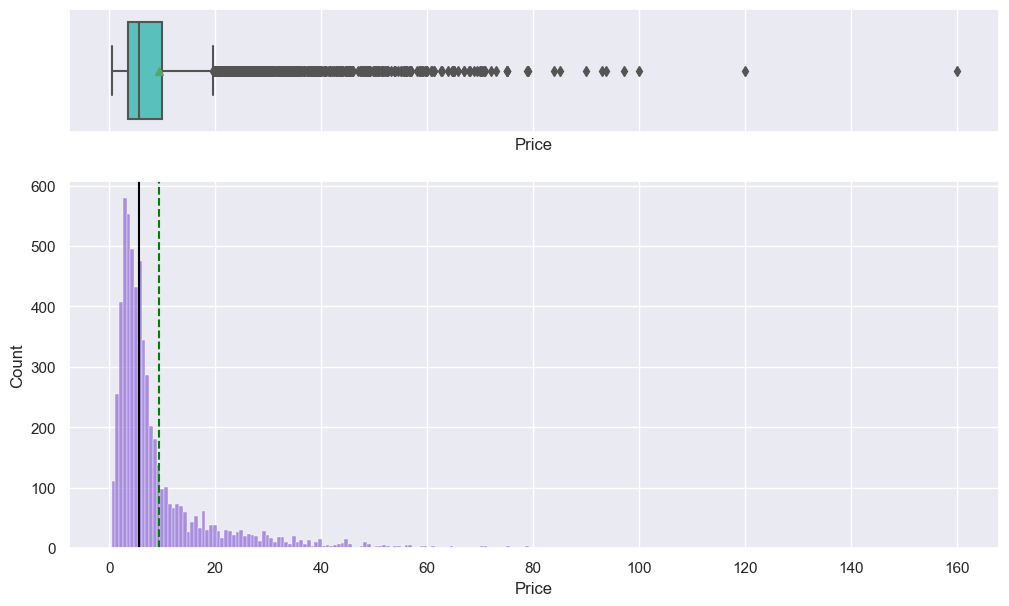

<IPython.core.display.Javascript object>

In [64]:
# Visualize pricing - this will be our target variable for regression
histogram_boxplot(cars, "Price")

This is highly right-skewed, and difficult to visualize across the entire inventory.  It's also difficult for me to gauge whether or not these prices are "reasonable", because I don't have a good sense of the whole concept of "lakh", and "crore". 

So - I'm iterating and revisiting this after spotting some values that didn't make sense.

In [65]:
cars.loc[cars["Price"] > 60]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Seats,New_Price,Price,Manufacturer,Model,Age,KM_Year,Owners,Mileage_Value,Engine_Displacement,Horsepower
264,264,Coimbatore,2017,29819,Diesel,Automatic,5.0,95.130,61.29,Mercedes-Benz,Gle,3,9939,1,11.57,2987.0,254.79
282,282,Kochi,2018,11287,Diesel,Automatic,7.0,101.960,70.36,Audi,Q7,2,5643,1,12.07,2967.0,241.40
327,327,Coimbatore,2017,97430,Diesel,Automatic,7.0,104.000,62.67,Audi,Q7,3,32476,1,14.75,2967.0,245.00
392,392,Coimbatore,2017,56451,Diesel,Automatic,5.0,49.490,62.81,Mercedes-Benz,S,3,18817,1,13.50,2987.0,282.00
418,418,Coimbatore,2018,22397,Petrol,Automatic,5.0,95.380,70.99,Mercedes-Benz,Glc,2,11198,1,11.50,2996.0,367.00
655,655,Mumbai,2017,10501,Petrol,Automatic,5.0,69.675,75.00,Jaguar,Xj,3,3500,1,9.43,1999.0,237.40
1038,1038,Bangalore,2011,55000,Diesel,Automatic,7.0,120.000,67.00,Land,Rover,9,6111,1,10.20,4367.0,308.00
1078,1078,Kolkata,2015,10512,Petrol,Automatic,2.0,136.000,64.00,Porsche,Boxster,5,2102,1,8.60,2706.0,265.00
1194,1194,Mumbai,2017,15000,Diesel,Automatic,5.0,86.970,69.50,Mercedes-Benz,E-Class,3,5000,1,13.00,2987.0,265.00
1336,1336,Mumbai,2016,20002,Diesel,Automatic,7.0,104.000,67.00,Audi,Q7,4,5000,1,14.75,2967.0,245.00


<IPython.core.display.Javascript object>

OK - 160 "lakh" is 16 million INR, which is about $195,000 US dollars. For a used Land Rover.  __Doesn't sound reasonable.__ 
Neither does 120 lakh, even for a Lambo.

The nearest other upscale vehicles are in the ballpark of 9.7 million INR, which is about $118,000 US Dollars.  

What about other BMW's?


In [66]:
cars.loc[cars["Manufacturer"] == "Bmw"]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Seats,New_Price,Price,Manufacturer,Model,Age,KM_Year,Owners,Mileage_Value,Engine_Displacement,Horsepower
20,20,Kochi,2014,32982,Diesel,Automatic,5.0,47.87,18.55,Bmw,3,6,5497,1,22.69,1995.0,190.0
86,86,Delhi,2011,75000,Diesel,Automatic,5.0,67.87,13.90,Bmw,5,9,8333,2,16.73,1995.0,218.0
113,113,Mumbai,2015,56087,Diesel,Automatic,5.0,54.43,20.75,Bmw,3,5,11217,1,22.69,1995.0,190.0
118,118,Mumbai,2009,128000,Petrol,Automatic,5.0,67.87,7.00,Bmw,5,11,11636,1,10.80,2497.0,215.0
137,137,Coimbatore,2015,31821,Diesel,Automatic,5.0,55.07,17.22,Bmw,1,5,6364,1,20.58,1995.0,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5751,5751,Hyderabad,2015,30000,Diesel,Automatic,5.0,54.43,22.00,Bmw,3,5,6000,1,18.88,1995.0,184.0
5775,5775,Mumbai,2013,30000,Diesel,Automatic,4.0,55.07,45.00,Bmw,6,7,4285,1,17.54,2993.0,313.0
5845,5845,Mumbai,2013,35000,Diesel,Automatic,5.0,67.87,21.00,Bmw,5,7,5000,1,16.73,2993.0,218.0
5868,5868,Kochi,2014,51240,Diesel,Automatic,4.0,54.43,29.52,Bmw,3,6,8540,1,8.20,2993.0,245.0


<IPython.core.display.Javascript object>

OK - My BMW's (likely all my vehicles) over 60 lakh are not reasonable. __I'm going to drop vehicles priced higher than 60 lakh__

In [67]:
cars.drop(cars[cars["Price"] > 60].index, inplace=True)

<IPython.core.display.Javascript object>

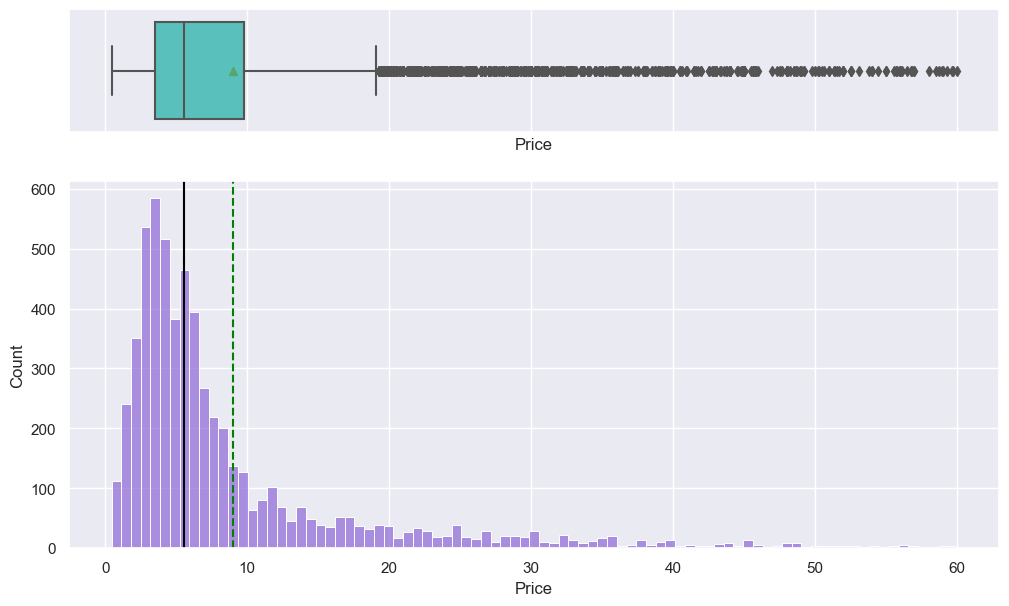

<IPython.core.display.Javascript object>

In [68]:
# Visualize pricing - this will be our target variable for regression
histogram_boxplot(cars, "Price")

In [69]:
# There are still 304 vehicles priced over 30 lakh
len(cars.loc[cars["Price"] > 30])

304

<IPython.core.display.Javascript object>

In [70]:
# One lakh is about $1200
len(cars.loc[cars["Price"] < 1])

77

<IPython.core.display.Javascript object>

We'll drop cars priced at the very low end, as well

In [71]:
cars.drop(cars[cars["Price"] < 1].index, inplace=True)

<IPython.core.display.Javascript object>

In [72]:
# Add a column to the dataset for log-transformed pricing
cars["Price_Log"] = np.log(cars["Price"])

<IPython.core.display.Javascript object>

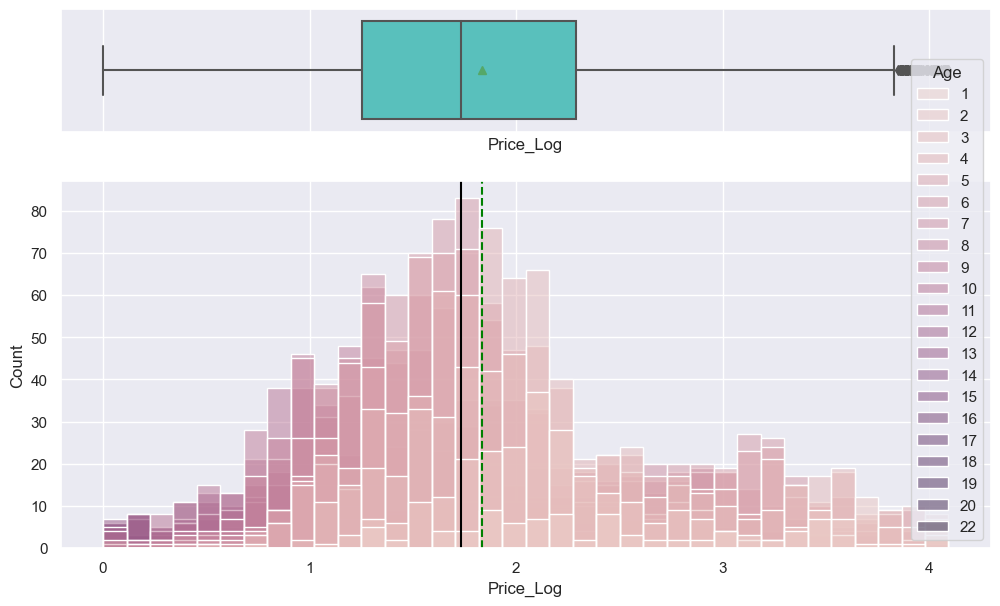

<IPython.core.display.Javascript object>

In [73]:
# Let's see how the log-transformed values look.  We'll use Age as a hue to help illustrate how pricing and age relate
histogram_boxplot(cars, "Price_Log", hue="Age")

That's a little better, and we can see our outliers a little more clearly. Using Age as a hue, we clearly see the distribution of older and newer cars in inventory, as well - with older vehicles further out from the mean on the left side of the graph.

How about the original (new-car) prices of the models in our inventory?

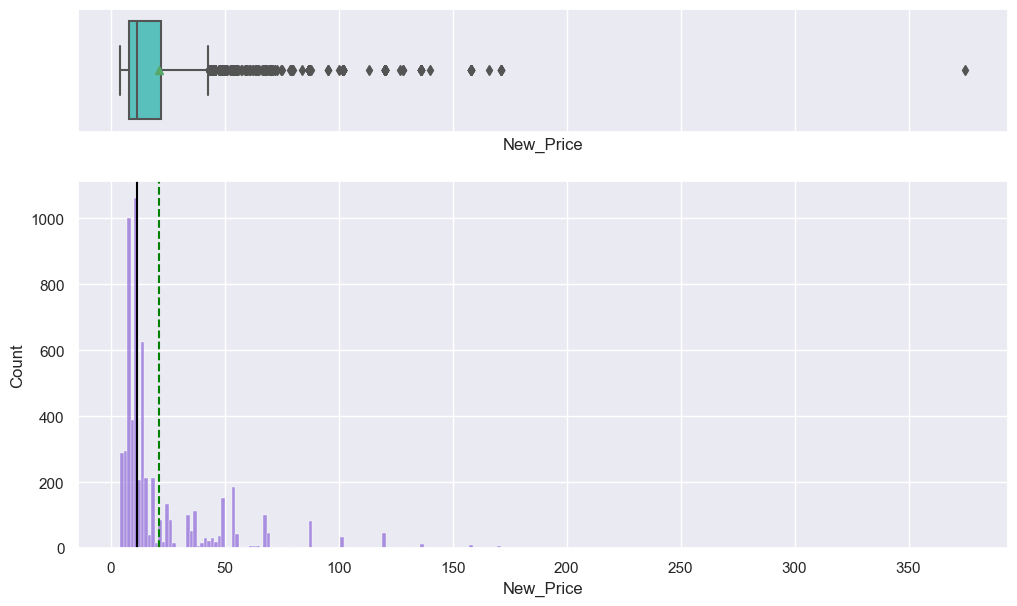

<IPython.core.display.Javascript object>

In [74]:
# Plot new car pricing for our inventory. This will ultimately help use understand our margins
histogram_boxplot(cars, "New_Price")

Also very skewed, our current pricing.  Again, my ignorance of "lakh" and "crore" requires some research and a calculator

In [75]:
len(cars.loc[cars["New_Price"] > 90])

116

<IPython.core.display.Javascript object>

375 lahk is about \\$455,000 US dollars, which seems excessive.  Bentley Continentals are upscale luxury vehicles, but they sold for a little over \\$200,000 in 2006 in the US. I don't have a good sense of who might have paid this much in the Indian market originally.

__I'm going to treat these vehicles as outliers, and drop them__

In [76]:
cars.drop(cars[cars["New_Price"] > 90].index, inplace=True)

<IPython.core.display.Javascript object>

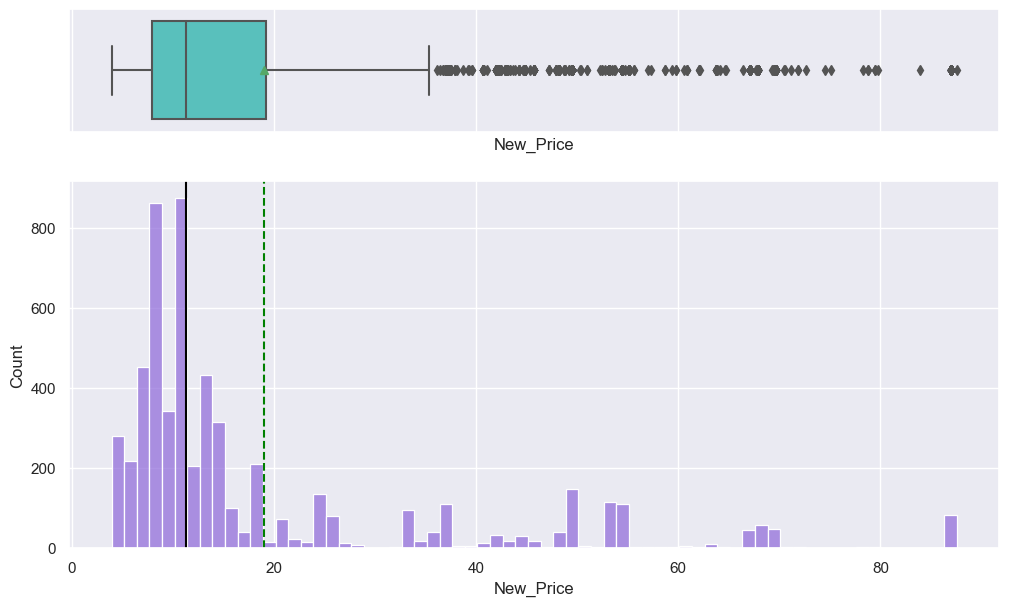

<IPython.core.display.Javascript object>

In [77]:
# Plot new car pricing for our inventory. This will ultimately help use understand our margins
histogram_boxplot(cars, "New_Price")

In [78]:
# There are still 84 vehicles with a new purchase price of over 80 lakh
len(cars.loc[cars["New_Price"] > 80])

84

<IPython.core.display.Javascript object>

In [79]:
# Add a column to the dataset for log-transformed new car pricing
cars["New_Price_Log"] = np.log(cars["New_Price"])

<IPython.core.display.Javascript object>

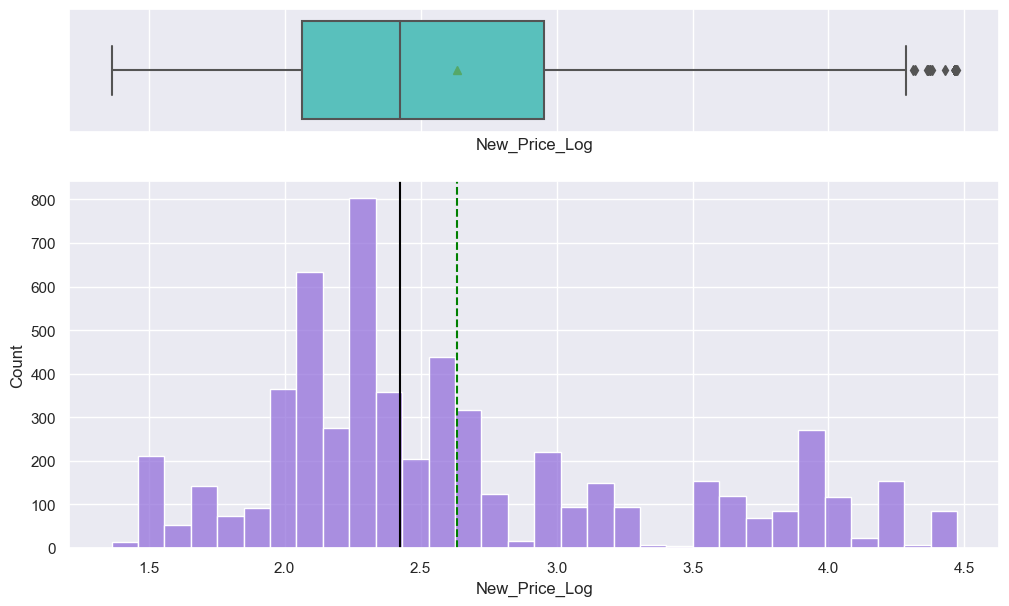

<IPython.core.display.Javascript object>

In [80]:
# Plot log-transformed new car pricing for our inventory. This should help with the scale
histogram_boxplot(cars, "New_Price_Log")

New car pricing is right-skewed, and relatively uneven. There are likely a number of factors in new car pricing with complex relationships. The distribution of used car pricing is more even; that suggests to me that it's important to select which new cars are going to do well in the used car market. 

Next we'll look at the model year for the cars in our inventory, and the age of those cars. Note that the assumption we're making for this assignment is that we're performing this analysis in __2020__, so the "age" is relative to 2020 - and not 2023.

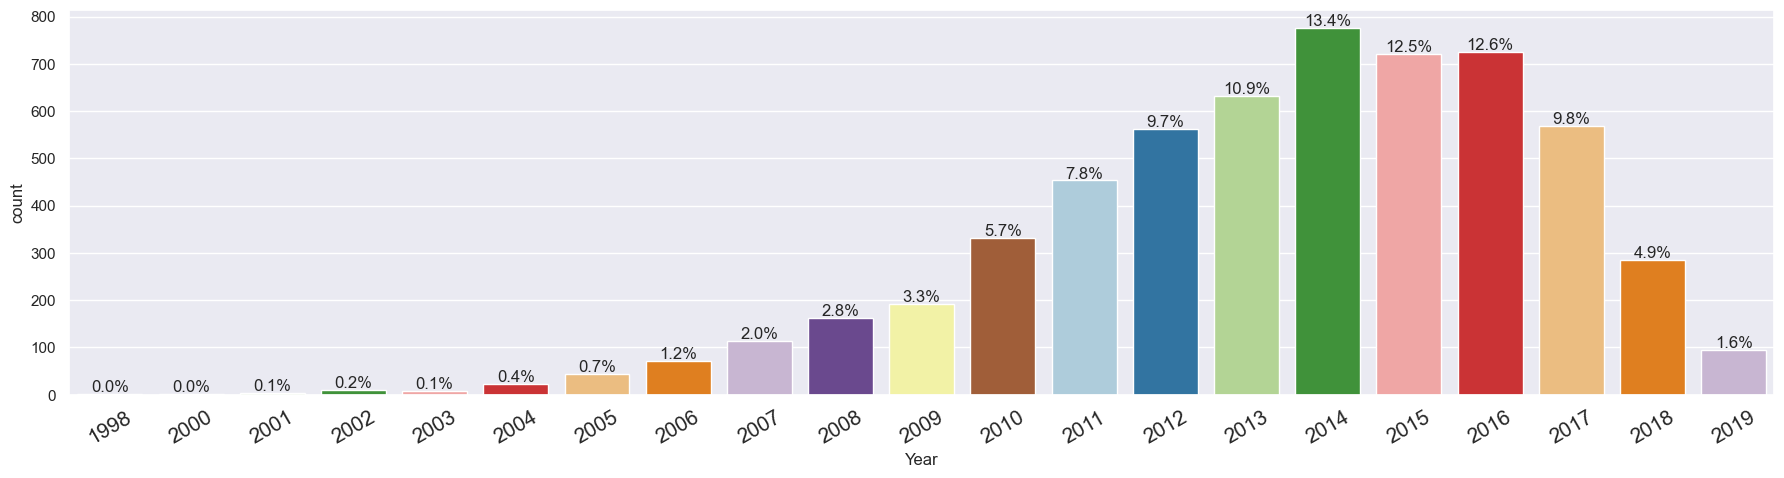

<IPython.core.display.Javascript object>

In [81]:
# Let's plot the model year for cars in our inventory
labeled_barplot(cars, "Year", perc=True)

A left-skewed distribution, we definitely have some older vehicles still in inventory.  Are those profitable? Our sweet spot in inventory seems to be 4-7 years old.

In [82]:
count_old_cars = len(cars.loc[cars["Age"] > 8])
old_cars = cars.loc[cars["Age"] > 8, "Price"].sum()
new_cars = cars.loc[cars["Age"] <= 8, "Price"].sum()
total_cars = old_cars + new_cars
print("Total Inventory value is ", total_cars / 100, "crore.")
print(
    "The value of older cars (over 8 years) in inventory is ",
    old_cars / total_cars * 100,
    "percent of inventory",
)
print(
    "The value of later model cars (less than 8 years) in inventory is ",
    new_cars / total_cars * 100,
    "percent of inventory",
)
print("Older vehicles number", count_old_cars)

Total Inventory value is  496.1725 crore.
The value of older cars (over 8 years) in inventory is  13.572840090895808 percent of inventory
The value of later model cars (less than 8 years) in inventory is  86.42715990910419 percent of inventory
Older vehicles number 1411


<IPython.core.display.Javascript object>

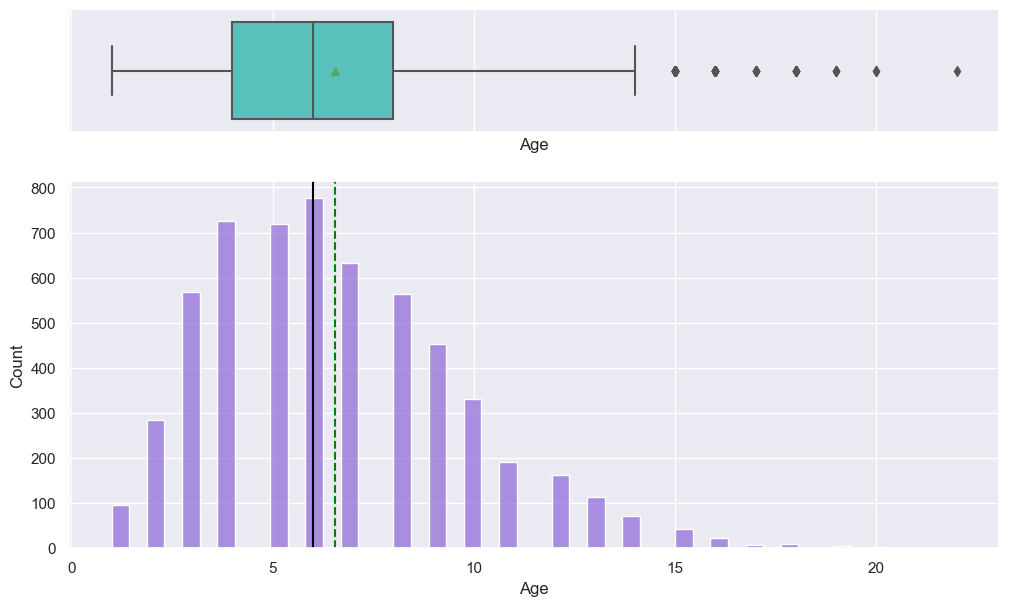

<IPython.core.display.Javascript object>

In [83]:
# Visualize the age of our vehicles our vehicles?
histogram_boxplot(cars, "Age")

This is another way of visualizing the age of the inventory; here we get a sense that our real outliers start at 14yrs old. Approximately 75% of our vehicles are 8 yrs old or less. We have a long tail of older vehicles.

Let's have a look at how many kilometers these cars have on them - how far have they been driven?

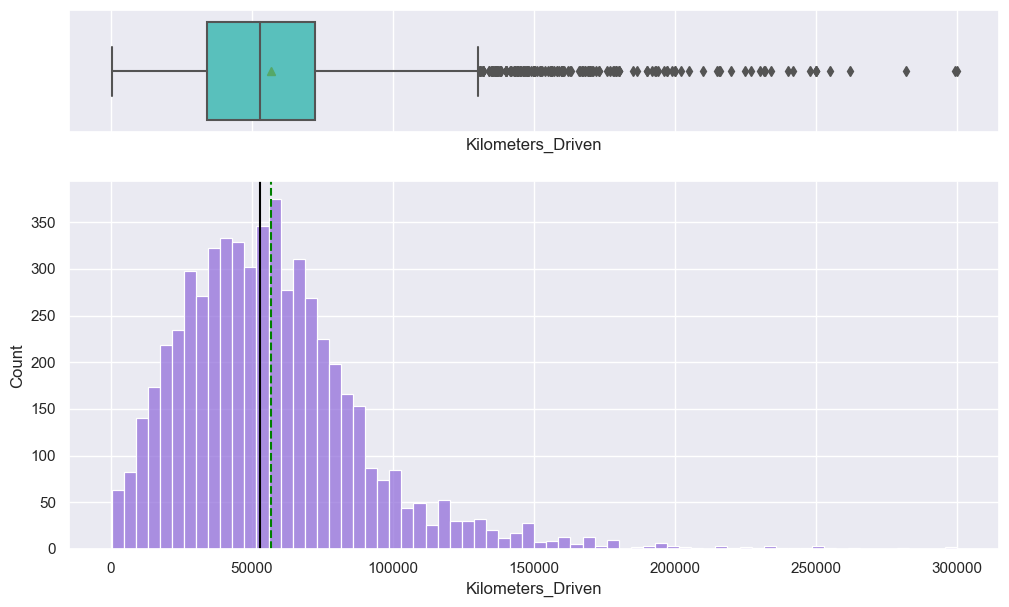

<IPython.core.display.Javascript object>

In [84]:
# Visualize distance driven - how "used" are our vehicles?
histogram_boxplot(cars, "Kilometers_Driven")

The majority of our cars have been driven less that 100K kilometers, but there's a significant right-skew here. Recall that we removed one clear outlier of 6M kilometers and a few outliers > 300K km, but there were several remaining with large (but plausible) values.  

Let's see if we can trim the high end down further


In [85]:
cars.loc[cars["Kilometers_Driven"] > 250000]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Seats,New_Price,Price,Manufacturer,Model,Age,KM_Year,Owners,Mileage_Value,Engine_Displacement,Horsepower,Price_Log,New_Price_Log
29,29,Mumbai,2007,262000,Diesel,Manual,7.0,24.01,4.0,Toyota,Innova,13,20153,4,12.80,2494.0,102.0,1.386294,3.178470
1528,1528,Hyderabad,2005,299322,Diesel,Manual,8.0,24.01,4.0,Toyota,Innova,15,19954,1,12.80,2494.0,102.0,1.386294,3.178470
1846,1846,Pune,2013,255000,Diesel,Manual,7.0,24.01,6.5,Toyota,Innova,7,36428,3,12.99,2494.0,100.6,1.871802,3.178470
1975,1975,Pune,2012,282000,Petrol,Manual,5.0,33.36,3.3,Skoda,Superb,8,35250,1,13.14,1798.0,160.0,1.193922,3.507358
3649,3649,Jaipur,2008,300000,Diesel,Manual,5.0,7.63,1.0,Tata,Indigo,12,25000,1,17.00,1405.0,70.0,0.000000,2.032088


<IPython.core.display.Javascript object>

In [86]:
# Let's drop the handful of cars over 250K kilometers
cars.drop(cars[cars["Kilometers_Driven"] > 250000].index, inplace=True)

<IPython.core.display.Javascript object>

In [87]:
# Add a column to the dataset for log-transformed mileage
cars["Kilometers_Driven_Log"] = np.log(cars["Kilometers_Driven"])

<IPython.core.display.Javascript object>

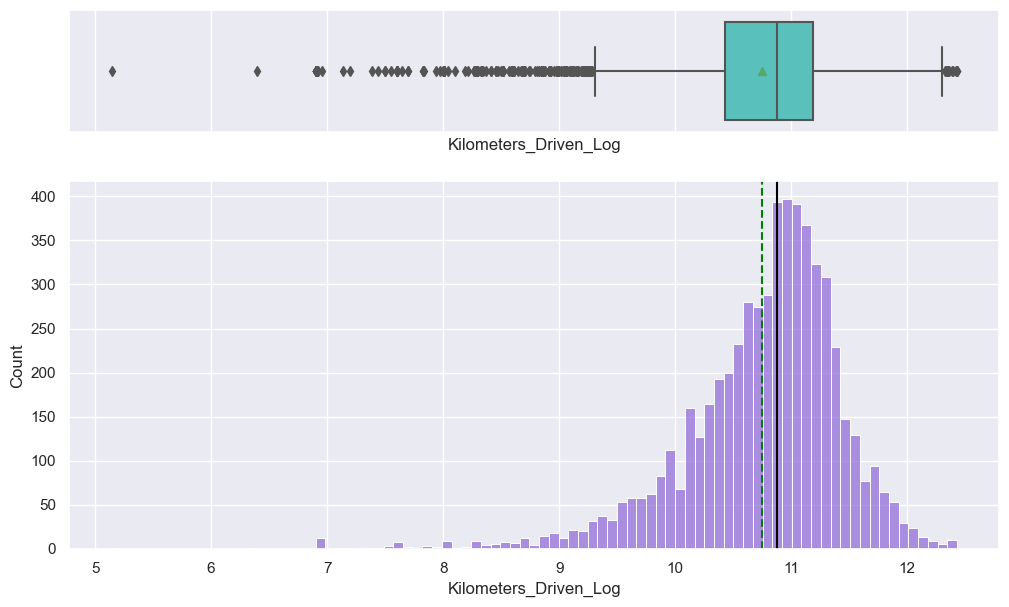

<IPython.core.display.Javascript object>

In [88]:
# Let's look at the log-transformed values for a better scale
histogram_boxplot(cars, "Kilometers_Driven_Log")

This helps with the scale to visualize the distribution of the odometer readings.We also see the low end of our Kilometers Driven more clearly.  Let's look at that.

In [89]:
cars.loc[cars["Kilometers_Driven"] <= 1000]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Seats,New_Price,Price,Manufacturer,Model,Age,KM_Year,Owners,Mileage_Value,Engine_Displacement,Horsepower,Price_Log,New_Price_Log,Kilometers_Driven_Log
173,173,Kolkata,2019,1000,Petrol,Manual,5.0,7.39,6.50,Hyundai,Grand,1,1000,1,18.90,1197.0,81.86,1.871802,2.000128,6.907755
1161,1161,Ahmedabad,2018,1000,Petrol,Automatic,5.0,7.15,6.85,Tata,Tigor,2,500,1,20.30,1199.0,84.00,1.924249,1.967112,6.907755
1198,1198,Hyderabad,2019,1000,Petrol,Manual,5.0,6.74,5.68,Volkswagen,Polo,1,1000,1,18.78,999.0,75.00,1.736951,1.908060,6.907755
1242,1242,Delhi,2018,1000,Diesel,Automatic,5.0,52.77,40.00,Jaguar,Xe,2,500,1,13.60,1999.0,177.00,3.688879,3.965943,6.907755
1361,1361,Mumbai,2019,171,Petrol,Manual,5.0,4.36,3.60,Maruti,Alto,1,171,1,24.70,796.0,47.30,1.280934,1.472472,5.141664
1598,1598,Jaipur,2017,1000,Diesel,Manual,5.0,7.63,7.50,Tata,Xenon,3,333,1,13.49,2179.0,138.03,2.014903,2.032088,6.907755
2054,2054,Mumbai,2017,1000,Petrol,Manual,5.0,7.87,6.36,Maruti,Ignis,3,333,1,20.89,1197.0,81.80,1.850028,2.063058,6.907755
2646,2646,Mumbai,2019,1000,Petrol,Manual,5.0,7.65,6.80,Ford,Figo,1,1000,1,18.12,1196.0,86.80,1.916923,2.034706,6.907755
5339,5339,Pune,2019,1000,Petrol,Manual,5.0,10.25,8.60,Hyundai,I20,1,1000,1,17.19,1197.0,81.86,2.151762,2.327278,6.907755
5606,5606,Mumbai,2019,600,Petrol,Automatic,5.0,6.80,6.25,Maruti,Wagon,1,600,1,21.50,1197.0,81.80,1.832581,1.916923,6.396930


<IPython.core.display.Javascript object>

Let's drop the very low values for `Kilometers_Driven`, as well

In [90]:
cars.drop(cars[cars["Kilometers_Driven"] <= 1000].index, inplace=True)

<IPython.core.display.Javascript object>

Remember that we earlier added a column with a metric for the number of kilometers driven per year for each vehicle.  That's a more individualized answer to the question, "how hard have these vehicles been used?", and it is likely a key metric for pricing - certainly one that retail buyers evaluate.

Let's plot Kilometers / Year:

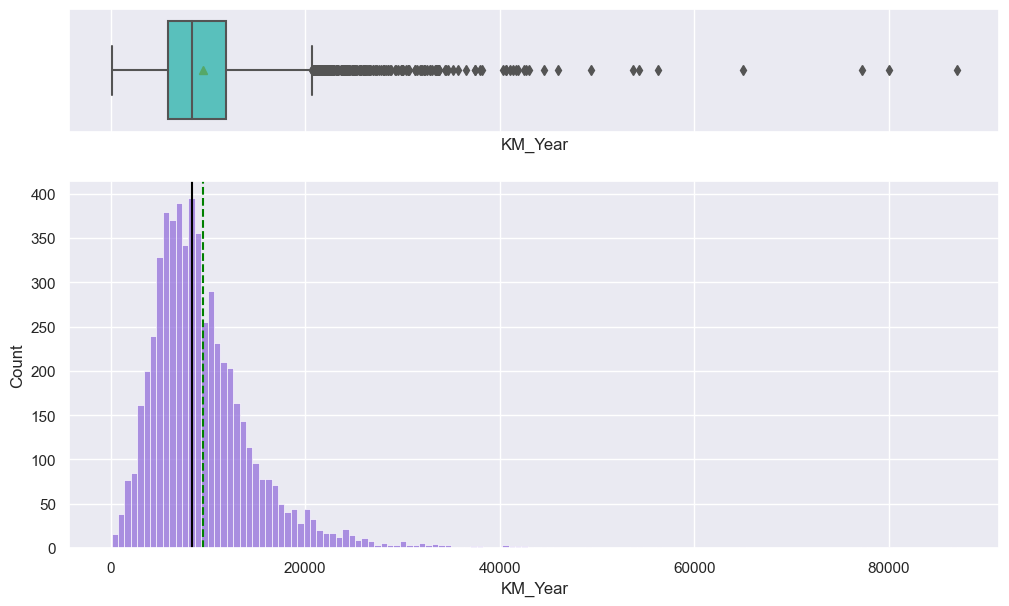

<IPython.core.display.Javascript object>

In [91]:
histogram_boxplot(cars, "KM_Year")

In [92]:
# List cars with unusually high driving usage per year
cars.loc[cars["KM_Year"] > 60000]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Seats,New_Price,Price,Manufacturer,Model,Age,KM_Year,Owners,Mileage_Value,Engine_Displacement,Horsepower,Price_Log,New_Price_Log,Kilometers_Driven_Log
572,572,Coimbatore,2019,77240,Diesel,Automatic,5.0,14.255,8.31,Hyundai,Verna,1,77240,1,22.32,1582.0,126.32,2.117460,2.657108,11.254673
1485,1485,Kolkata,2019,80000,Diesel,Manual,7.0,37.170,8.99,Toyota,Fortuner,1,80000,1,11.50,2982.0,171.00,2.196113,3.615502,11.289782
3059,3059,Delhi,2019,87000,Diesel,Automatic,5.0,52.460,6.67,Bmw,3,1,87000,1,22.69,1995.0,190.00,1.897620,3.960051,11.373663
4399,4399,Chennai,2019,65000,Diesel,Automatic,5.0,7.880,6.75,Maruti,Swift,1,65000,1,26.59,1248.0,74.00,1.909543,2.064328,11.082143


<IPython.core.display.Javascript object>

In [93]:
# These are one year old vehicles with suspiciously high Kilometers per year
cars.drop(cars[cars["KM_Year"] > 60000].index, inplace=True)

<IPython.core.display.Javascript object>

This gives us a pretty good picture of the bulk of our usage, but it's also significantly right-skewed.  Ultimately, we'll want to analyze the mileage, age, and pricing to understand the relationship.

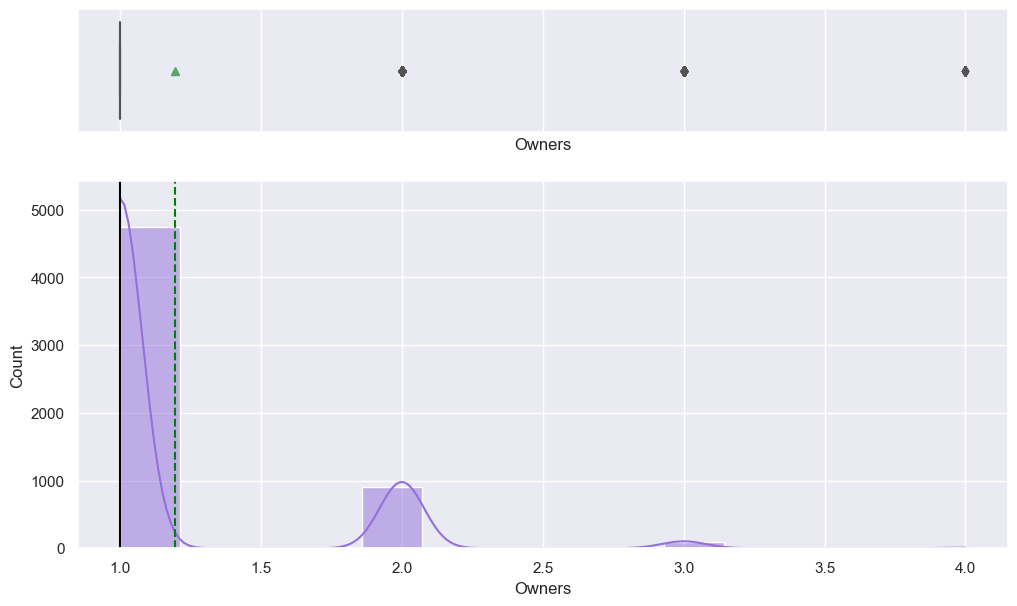

<IPython.core.display.Javascript object>

In [94]:
# Plot number of owners
histogram_boxplot(cars, "Owners", kde=True)

Most of our vehicles have had a single owner. We have a fair inventory with two previous owners, but very few with more than two.

Let's switch gears (no pun intended) and look at some characteristics of the vehicles themselves in our inventory.

How economical are these vehicles to operate?  What's the mileage value in distance/liter or kg?

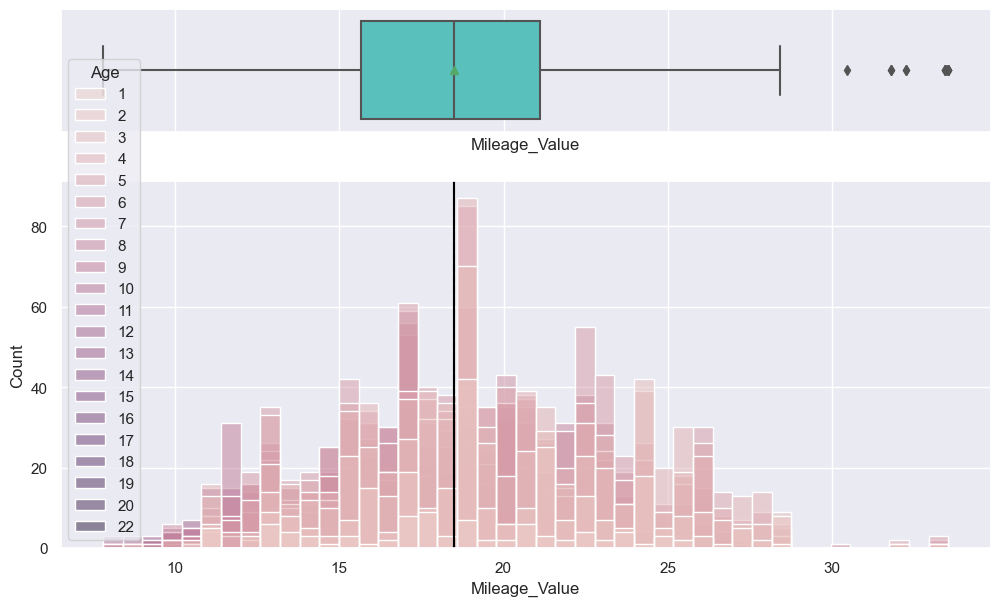

<IPython.core.display.Javascript object>

In [95]:
# Plot the units of the mileage value; note these all in kilometers, but the fuel is measured in liters or kilograms
histogram_boxplot(cars, "Mileage_Value", hue="Age")

We have some interesting outliers here. Most of these cars are delivering less than 20 kilometers per unit. With the age of the vehicle providing some color, you can see generally that old vehicles don't perform as economically. We do have some outliers with higher mileage performance.

In [96]:
# List cars with unusually high driving usage per year
cars.loc[cars["Mileage_Value"] > 30]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Seats,New_Price,Price,Manufacturer,Model,Age,KM_Year,Owners,Mileage_Value,Engine_Displacement,Horsepower,Price_Log,New_Price_Log,Kilometers_Driven_Log
1269,1269,Mumbai,2018,10600,CNG,Manual,4.0,4.36,3.50,Maruti,Alto,2,5300,1,33.44,796.0,40.30,1.252763,1.472472,9.268609
1332,1332,Pune,2013,79494,CNG,Manual,5.0,5.54,2.96,Maruti,Wagon,7,11356,1,33.54,998.0,67.04,1.085189,1.711995,11.283437
2059,2059,Mumbai,2013,54000,CNG,Manual,5.0,5.58,3.05,Maruti,Wagon,7,7714,1,33.54,998.0,67.04,1.115142,1.719189,10.896739
2371,2371,Pune,2014,29202,CNG,Manual,5.0,5.54,3.90,Maruti,Wagon,6,4867,1,33.54,998.0,67.04,1.360977,1.711995,10.281992
2701,2701,Kochi,2016,70536,CNG,Manual,5.0,5.87,4.58,Maruti,Celerio,4,17634,1,31.79,998.0,58.33,1.521699,1.769855,11.163878
3119,3119,Kochi,2018,44202,CNG,Manual,4.0,4.66,4.00,Maruti,Alto,2,22101,1,32.26,998.0,58.20,1.386294,1.539015,10.696525
3129,3129,Delhi,2014,74663,CNG,Manual,5.0,5.35,3.25,Maruti,Wagon,6,12443,1,33.54,998.0,67.04,1.178655,1.677097,11.220740
3553,3553,Pune,2015,18000,CNG,Manual,4.0,4.36,3.00,Maruti,Alto,5,3600,1,33.44,796.0,40.30,1.098612,1.472472,9.798127
3869,3869,Delhi,2012,65537,CNG,Manual,4.0,4.36,2.10,Maruti,Alto,8,8192,2,33.44,796.0,40.30,0.741937,1.472472,11.090370
4141,4141,Mumbai,2014,47200,CNG,Manual,5.0,5.58,2.85,Maruti,Wagon,6,7866,1,33.54,998.0,67.04,1.047319,1.719189,10.762149


<IPython.core.display.Javascript object>

A quick google shows this is the valid value for the CNG version of the Maruti vehicles

Next, let's look at a couple of catagorical variables: our mix of fuel types, and the type of transmission in our vehicles

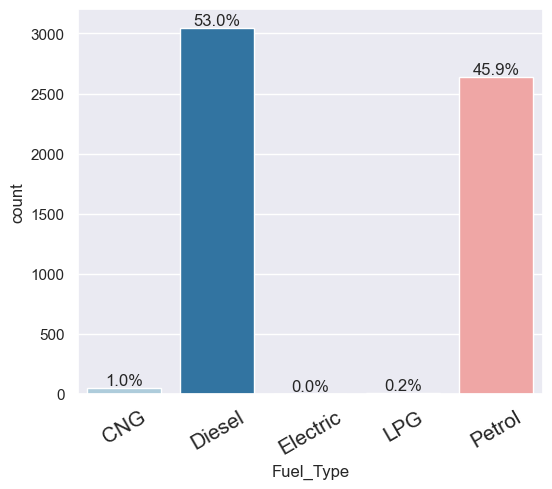

<IPython.core.display.Javascript object>

In [97]:
# Let's plot the handful of fuel types represented in our inventory
labeled_barplot(cars, "Fuel_Type", perc=True)

It's a fairly even mix of petrol and diesel fuels, with a very few CNG/LPG vehicles, and a miniscule number of EVs

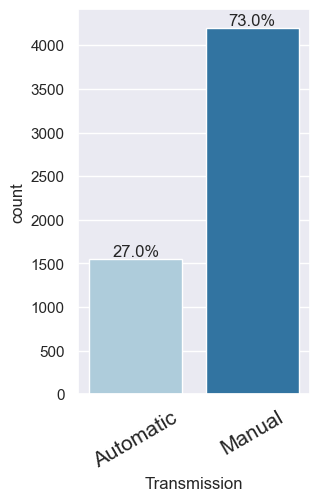

<IPython.core.display.Javascript object>

In [98]:
# Break down the two types of transmissions
labeled_barplot(cars, "Transmission", perc=True)

This makes sense; only in the US do you find a preponderance of automatic transmissions.  We have a fair percentage in our inventory to satistfy that particular demand, and perhaps we could charge a premium for automatic vehicles.

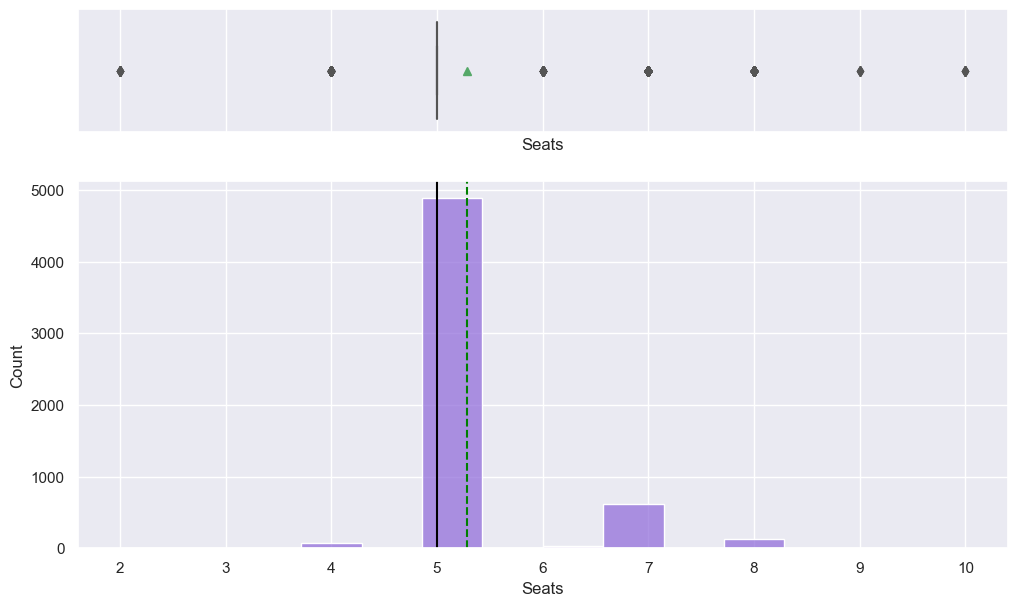

<IPython.core.display.Javascript object>

In [99]:
# The distribution of the seating capacity for our vehicles.
histogram_boxplot(cars, "Seats")

As we discovered earlier, we have some vehicles with high-capacity seating in our inventory. The bulk of our cars look like family sedans, seating 5 passengers.

Let's take a look at some characteristics of power in these vehicles, engine size and power output.

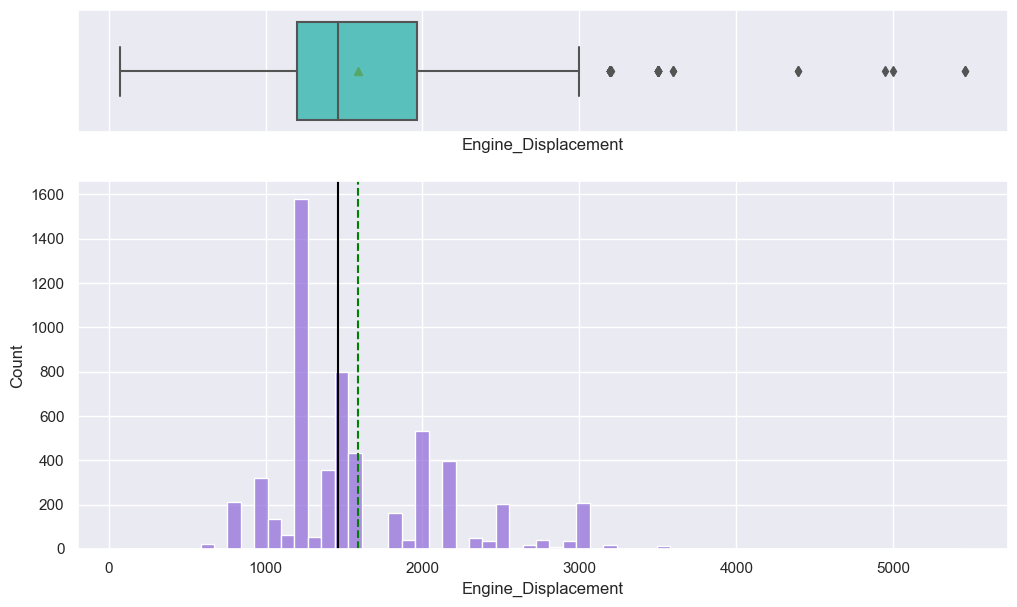

<IPython.core.display.Javascript object>

In [100]:
histogram_boxplot(cars, "Engine_Displacement")

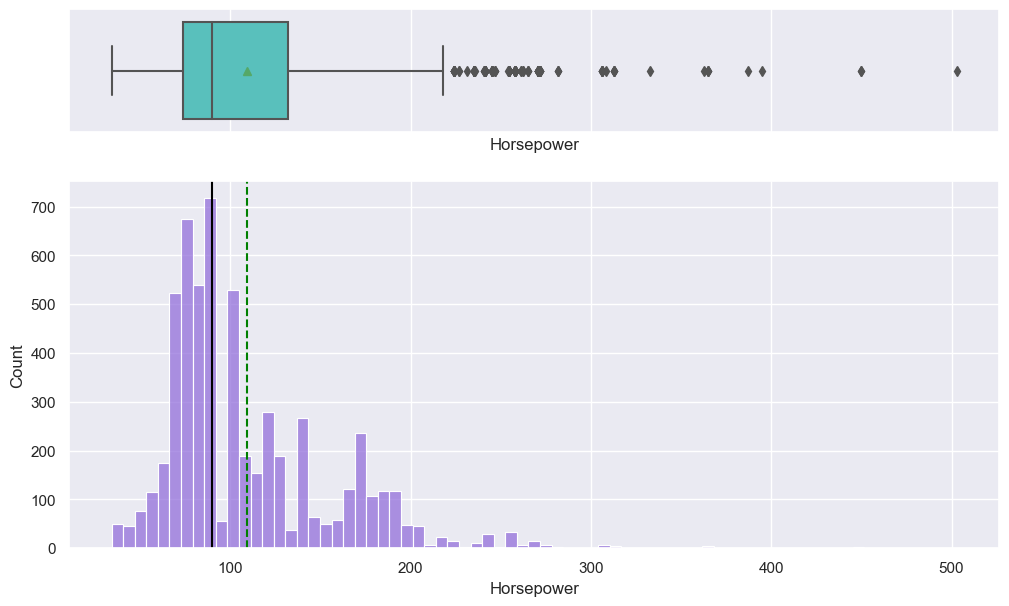

<IPython.core.display.Javascript object>

In [101]:
histogram_boxplot(cars, "Horsepower")

The bulk of our inventory are vehicles with about a 1.5L displacement, producing around 100 bhp. But there's a fair distribution doesn't strictly track with horsepower. It may be worth keeping both of these to understand what the customer values most.

In [102]:
# List cars with unusually high horsepower
cars.loc[cars["Horsepower"] > 400]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Seats,New_Price,Price,Manufacturer,Model,Age,KM_Year,Owners,Mileage_Value,Engine_Displacement,Horsepower,Price_Log,New_Price_Log,Kilometers_Driven_Log
4627,4627,Kochi,2010,65329,Petrol,Automatic,4.0,55.070,20.72,Bmw,6,10,6532,1,7.94,4395.0,450.0,3.031099,4.008605,11.087191
4821,4821,Mumbai,2011,5900,Petrol,Automatic,4.0,55.070,47.50,Bmw,6,9,655,1,7.94,4395.0,450.0,3.860730,4.008605,8.682708
5088,5088,Coimbatore,2011,43686,Petrol,Automatic,4.0,69.675,50.66,Jaguar,Xj,9,4854,1,10.50,5000.0,503.0,3.925137,4.243842,10.684783


<IPython.core.display.Javascript object>

These are high, but they check out in google as accurate

What is the distribution of manufacturers in our inventory?

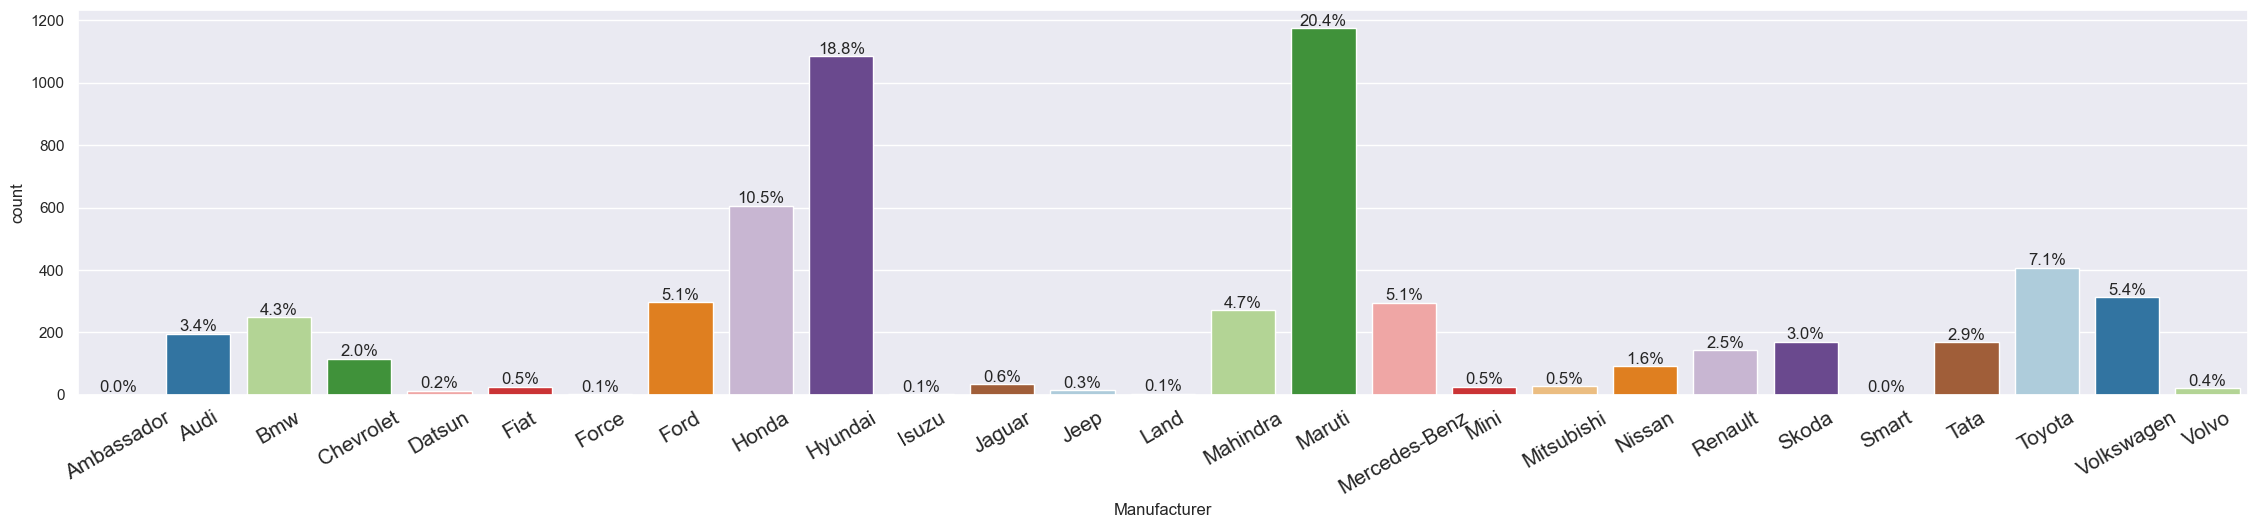

<IPython.core.display.Javascript object>

In [103]:
# Plot out values and percentages of manufacturers in our inventory
labeled_barplot(cars, "Manufacturer", perc=True, n=None)

How do the prices of our used vehicles vary by manufacturer?

Text(0, 0.5, 'Average Price (Lakh)')

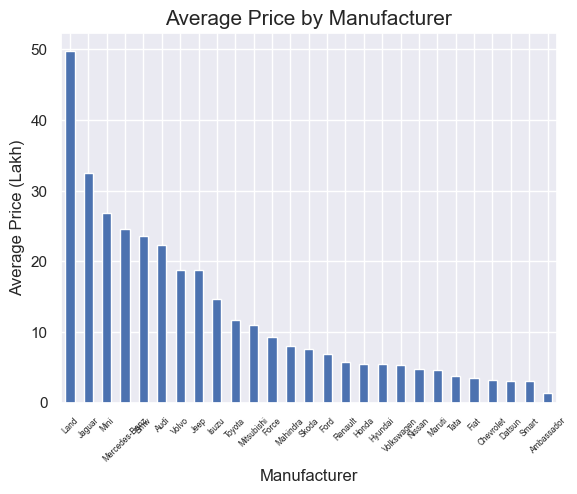

<IPython.core.display.Javascript object>

In [104]:
# Plot our inventory, grouping by manufacturer and visualize the mean price
df = cars.groupby(by=["Manufacturer"])["Price"].mean()
ax = df.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=45, fontsize=6)
plt.title("Average Price by Manufacturer", fontsize=15)
ax.set_ylabel("Average Price (Lakh)")

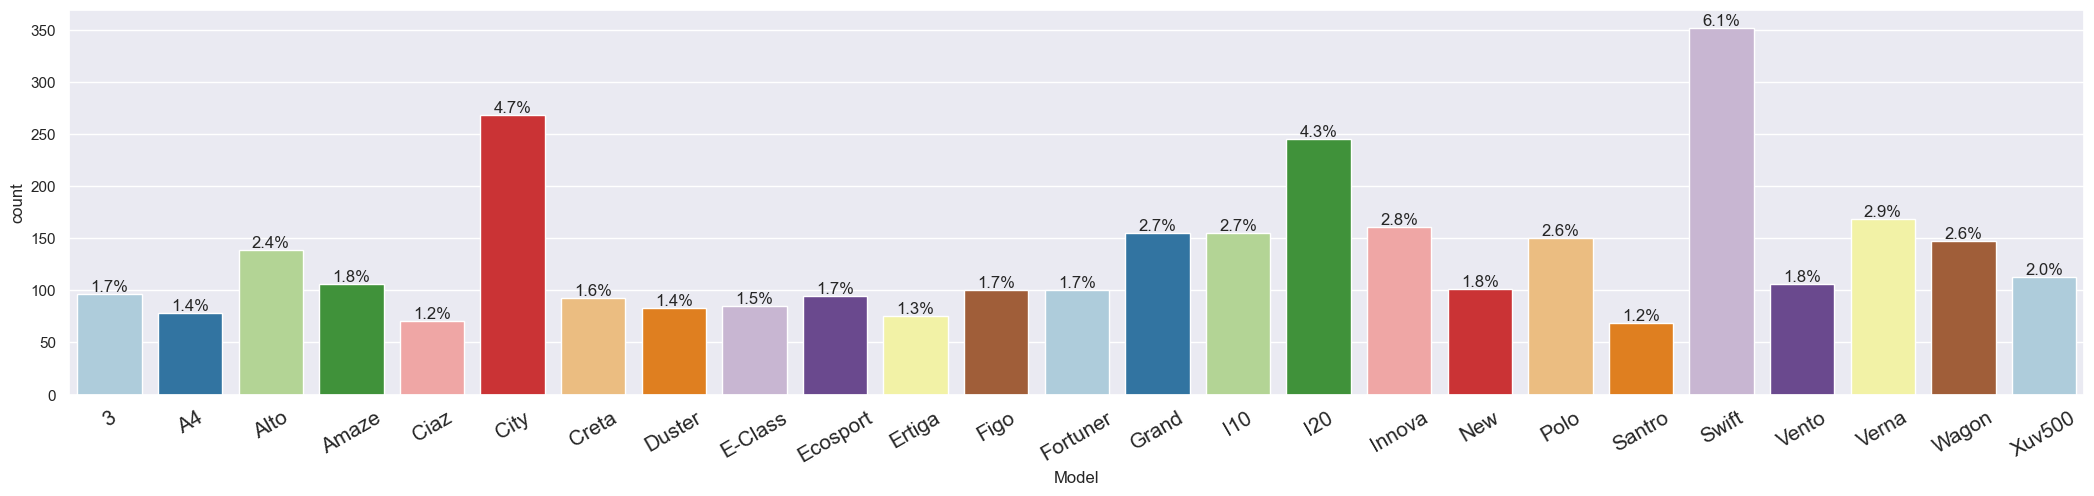

<IPython.core.display.Javascript object>

In [105]:
# Let's look at a snapshot of the models in our inventory
labeled_barplot(cars, "Model", perc=True, n=25)

Here's a simple list of the top 25 most popular vehicles in our inventory

In [106]:
# List the top 25 cars in Inventory by count
cars.groupby(by=["Manufacturer", "Model"]).size().sort_values(ascending=False).head(25)

Manufacturer   Model   
Maruti         Swift       352
Honda          City        268
Hyundai        I20         245
               Verna       169
Toyota         Innova      161
Hyundai        I10         155
               Grand       151
Volkswagen     Polo        150
Maruti         Wagon       147
               Alto        139
Mahindra       Xuv500      113
Honda          Amaze       106
Volkswagen     Vento       106
Toyota         Fortuner    100
Ford           Figo        100
Bmw            3            97
Ford           Ecosport     95
Mercedes-Benz  New          94
Hyundai        Creta        93
Mercedes-Benz  E-Class      85
Renault        Duster       83
Audi           A4           78
Maruti         Ertiga       75
               Ciaz         71
Hyundai        Santro       69
dtype: int64

<IPython.core.display.Javascript object>

Next, we'll plot the locations around India where we have our inventory located.  This is a very basic map - my first attempt with geopandas. On a basic outline of the country and state boundaries, we'll show inventory in city locations where the size of the marker is scaled by the number of vehicles in that city. That'll give us an idea of where the cars are located by count; if we were building an interactive search function, it would be trivial to add location to each car record.

#### Location Functions

In [107]:
def get_coordinates(city_list):
    """Takes a list of cities and returns a dictionary of the cities and their corresponding coordinates."""
    geolocator = Nominatim(user_agent="location script")
    dicto = {}

    for city in city_list:
        try:
            location = geolocator.geocode(city)
        except:
            raise Exception("There was a problem with the getCoordinates function")
        coordinate_values = (
            location.longitude,
            location.latitude,
        )  # in geopandas, the x value corresponds to the longitude while the y value, the latitude
        # Just in case you were wondering why it was *location.longitude, location.latitude* and not the other way round
        dicto[
            city
        ] = coordinate_values  # adding the coordinate pair to the dictionary at the end of every loop
    return dicto  # finally returns the dict

<IPython.core.display.Javascript object>

In [108]:
# get the cities from the location column
cities = cars.Location.values.tolist()
# convert to a set to produce a list of unique city names
city_set = set(cities)
# call the function to fetch the coordinates of each city to plot
city_coords_dict = get_coordinates(city_set)

<IPython.core.display.Javascript object>

In [109]:
# We'll create another dictionary here of counts of vehicles in each city, to use to size our markers
markersizes = []
city_inventory = {}
for city in city_set:
    city_inventory[city] = cars[cars["Location"] == city].value_counts().sum()
    # I'm scalling here to produce a marker you can differentiate, but that doesn't look huge
    markersizes.append(city_inventory[city] * 0.3)

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-info">
<b>Dependency:</b> I have a local repository with the map files for India on my desktop machine, in a subdirectory with my notebook
</div>

In [110]:
# I have to pull in a local copy of an outline map of India, and the Indian states
fp = r"Maps_with_python/india-polygon.shp"
india_gdf = gpd.read_file(fp)  # Reads the shape file of India for plotting purpose
india_gdf_copy = gpd.read_file(fp)

<IPython.core.display.Javascript object>

#### Plot the locations of our inventory

<AxesSubplot:>

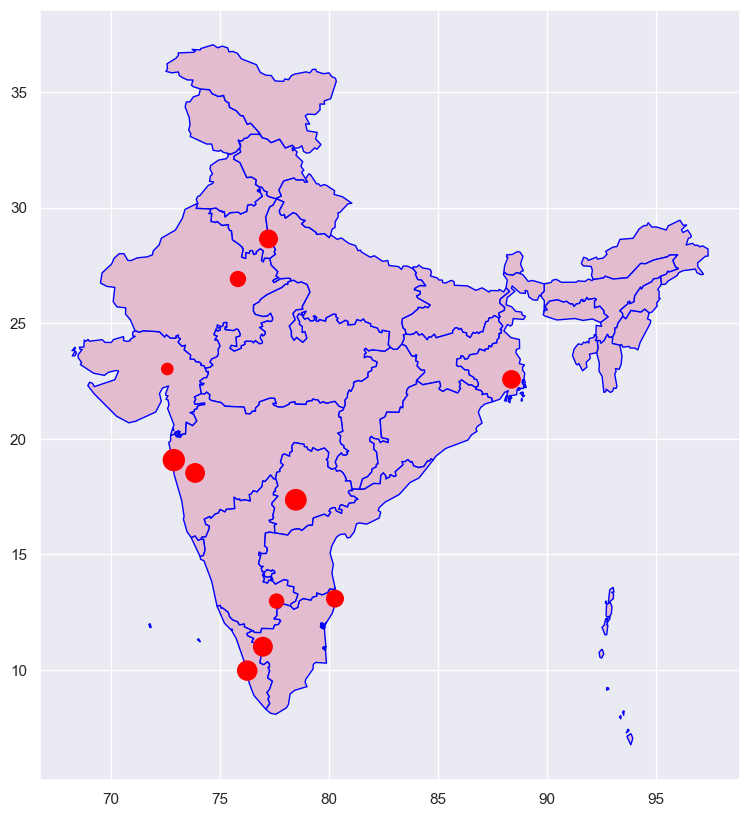

<IPython.core.display.Javascript object>

In [112]:
# This draws the map
ax = india_gdf.plot(color="#e3bccf", edgecolor="blue")
plt.rcParams["figure.figsize"] = [
    10,
    10,
]

# This plots the location of the cities
cities_geom = [Point(i) for i in city_coords_dict.values()]
d = {
    "Cities": [city for city in city_coords_dict.keys()],
    "geometry": cities_geom,
}

# we have to create a gdf so that we can add the crs information so we need geopandas now
# CRS is the coordinate reference system we're using
cities_gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
cities_gdf

# This is where we reference our marker sizes we created above
cities_gdf.plot(ax=ax, color="red", markersize=markersizes)

__Inventory Counts by Location__

Text(0, 0.5, 'Number of Vehicles')

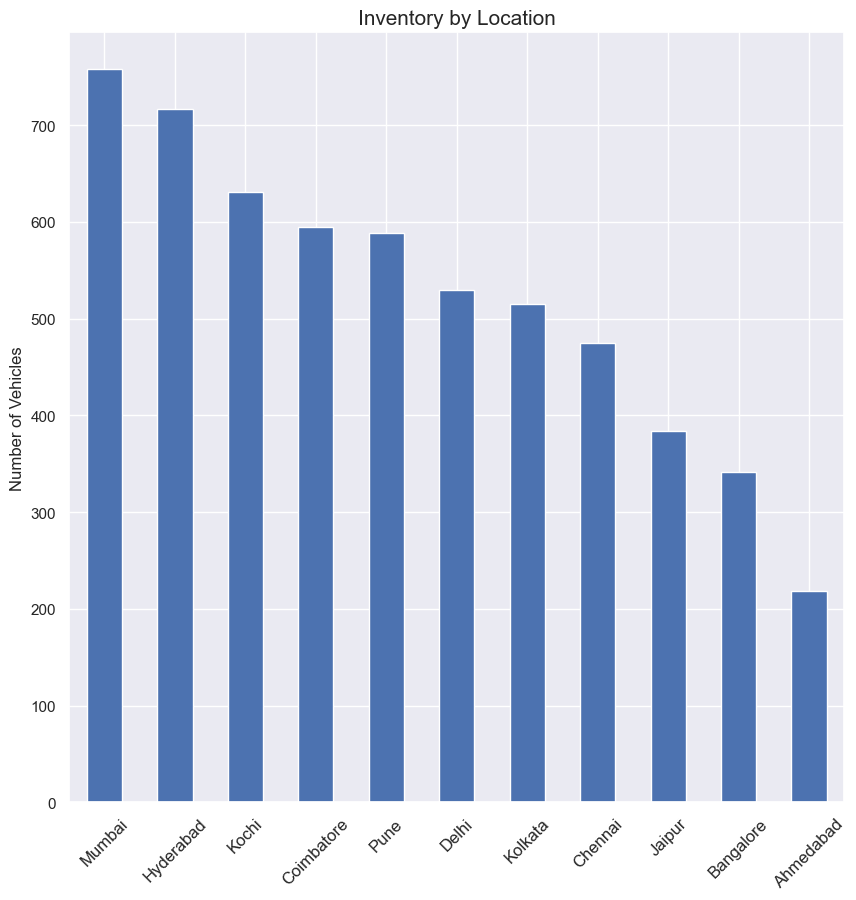

<IPython.core.display.Javascript object>

In [113]:
# We'll generate a simple sorted bar graph with inventory counts by city
df = pd.DataFrame.from_dict(city_inventory, orient="index")
ax = df.sort_values(by=0, ascending=False).plot.bar(legend=None)
plt.title("Inventory by Location", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
ax.set_ylabel("Number of Vehicles")

__Let's have a look at prices by location - the cities where we have our inventory__

Text(0, 0.5, 'Average Price (Lakh)')

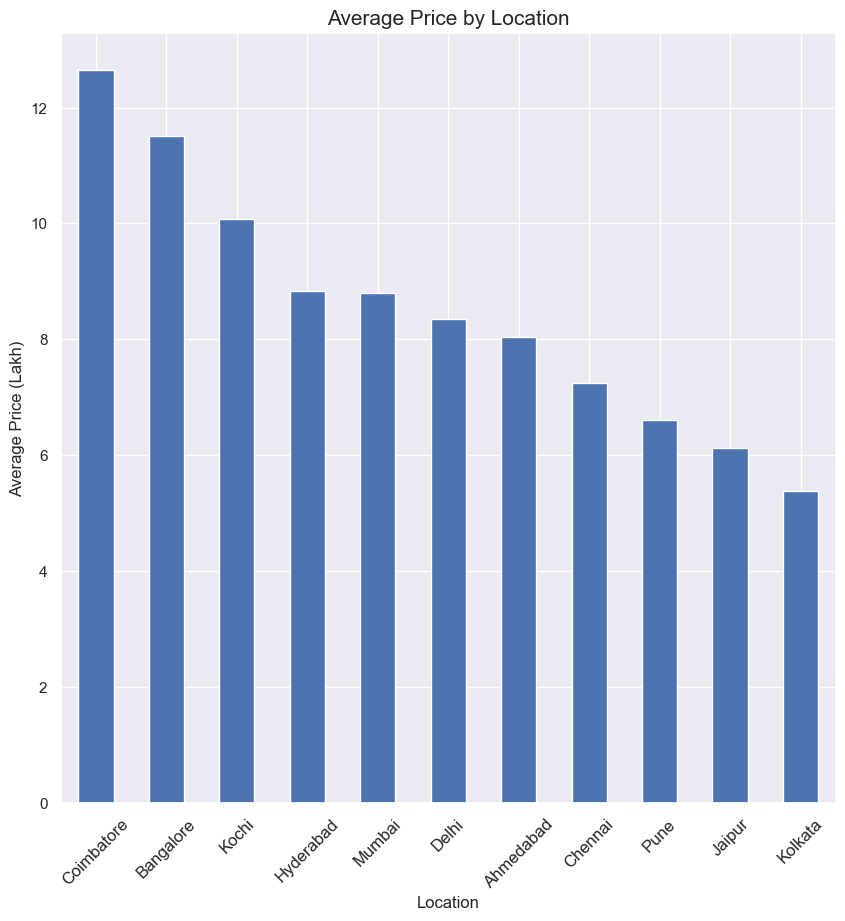

<IPython.core.display.Javascript object>

In [114]:
# We'll generate a simple sorted bar graph with average prices of vehicles in inventory by city
df = cars.groupby(by=["Location"])["Price"].mean()
ax = df.sort_values(ascending=False).plot.bar()
plt.title("Average Price by Location", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
ax.set_ylabel("Average Price (Lakh)")

In [115]:
# Current state of the dataframe
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5755 entries, 0 to 6018
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   S.No.                  5755 non-null   object  
 1   Location               5755 non-null   object  
 2   Year                   5755 non-null   int64   
 3   Kilometers_Driven      5755 non-null   int64   
 4   Fuel_Type              5755 non-null   category
 5   Transmission           5755 non-null   category
 6   Seats                  5755 non-null   float64 
 7   New_Price              5755 non-null   float64 
 8   Price                  5755 non-null   float64 
 9   Manufacturer           5755 non-null   object  
 10  Model                  5755 non-null   object  
 11  Age                    5755 non-null   int64   
 12  KM_Year                5755 non-null   int64   
 13  Owners                 5755 non-null   int64   
 14  Mileage_Value          5755 non-null   f

<IPython.core.display.Javascript object>

#### Observations on individual variables
* __Price__ and __Price_Log__: 
    * 17% of our inventory records did not include pricing. Since we're building a model to predict pricing, these records aren't going to help us, and we dropped them
    * Pricing was highly skewed, and we implemented a log transformation to better visualize the distribution
    * With that transform, we were able to color the distribution with age; pricing tracked as expected with age, but there were some significant outliers at the higher end. 
    * There's early indications that pricing doesn't track evenly with new car pricing, and we'll dig into that in this next section
* __New_Price__ and __New_Price_Log__: 
    * New price also had a number of outliers at the high end, and was similarly right-skewed as Price. A log transformation was helpful to see the distribution, but we'll want to explore Price and New Price together to understand what's going on with the outliers
    * The relationship between new car price and used car price will also give us a key insight into depreciation, and we'll explore that in the next section.

* __Kilometers_Driven__,__Kilometers_Driven_Log__, and __KM_Year__
    * There's a very wide spread of kilometers driven, with significant outliers on the high end approaching 300K km. That's about 186K US miles, which is certainly within the service life of a modern vehicle. So - plausible, but high-mileage. That should actually give us important signal about how kilometers driven impacts pricing.
    * The log transformation in this case also gave us a good view of the distribution, and the kilometers driven per year allowed us another perspective on essentially the same distribution.
    
* __Year__ and __Age__:
    * This distribution is left-skewed, with some significant older vehicles in the inventory. 
    * Our "sweet spot" for vehicle age is somewhere around 4-7 years old; more than 50% of our vehicles are less than 10 years old
    * We should make a recommendation to aggressively move these older vehicles out of inventory, and make room for newer models
* __Owners__
    * Most of our vehicles have had a single owner; some have had two owners. Any number above 2 is an outlier.
    * From a practical perspective, more than one onwer makes it more difficult to establish the vehicle's history   

* __Mileage_Value__
    * Not surprisingly, older vehicles are just not as economical to operate, delivering poorer mileage
    * Clearing out older vehicles to make room for new vehicles would support the business using that as a differentiator
* __Fuel_Type__
    * Roughly half our inventory is diesel. CNG and LPG are represented in inventory, but not very extensively.
    * There are a very few electric vehicles in our inventory at this time
    * The key to being successful with less available fuel types will be matching those with the correct market
* __Transmission__
    * A little over 70% manual.  No surprise for this market.
    * We have sufficient automatic options in inventory to address demand.
* __Seats__
    * Most of our vehicles are "sedan" sized seating (5 seats), but we have some high-capacity vehicles in inventory. 
    * We have a significant number of 7-seat vehicles
* __Engine_Displacement__ and __Horsepower__
    * These both showed significant outliers at the high end, but still plausible values. A six liter engine is not common in our inventory in India, but it's common in markets like the US

* __Manufacturer__ and __Model__
    * We broke out manufacturer and model into separate variables
    * We ranked manufacturers by average pricing
    * We broke out models by inventory level

* __Location__ 
    * For location, we mapped our inventory locations in the country with markers corresponding to the inventory level
    * We ranked cities by inventory level
    * We also visualized pricing by city, to show cities supporting the highest average pricing

### Multivariant Analysis

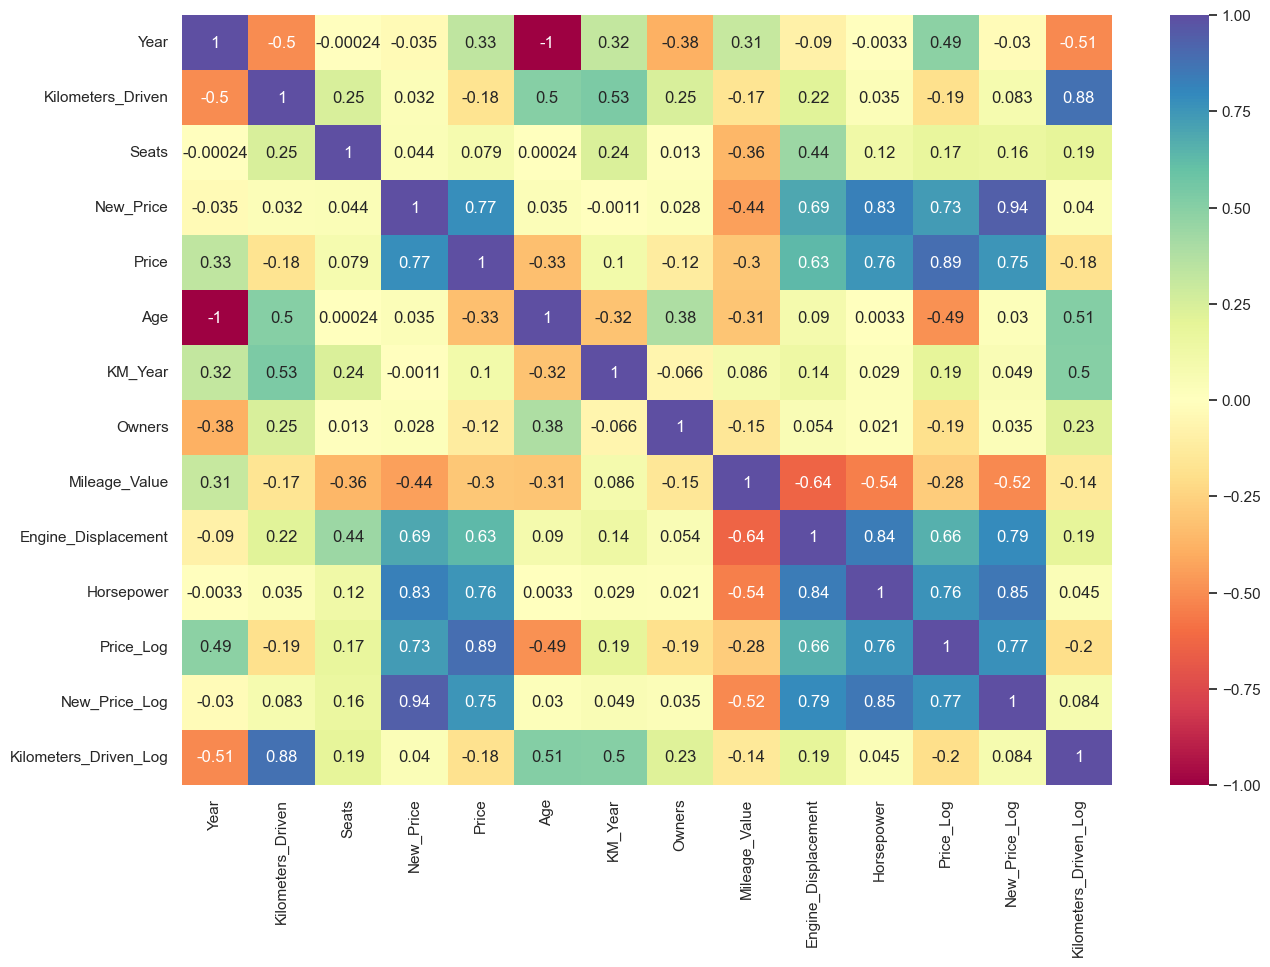

<IPython.core.display.Javascript object>

In [116]:
# The heatmap will give us a correlation matrix of our numeric data
plt.figure(figsize=(15, 10))
sns.heatmap(cars.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.show()

We have a lot of overlap here, but this first pass can help us select what columns to drop. Let's copy the dataset, drop what we don't need, and then re-run the heatmap.

In [117]:
# let's create a copy of the data and then we'll trim it
cars_model = cars.copy()

<IPython.core.display.Javascript object>

In [118]:
cars_model.drop(["Year"], axis=1, inplace=True)  # Age in years is easier to work with
cars_model.drop(
    ["Seats"], axis=1, inplace=True
)  # Seats doesn't seem to provide much insight
cars_model.drop(
    ["KM_Year"], axis=1, inplace=True
)  # Kilometers Driven in total is actually stronger here
cars_model.drop(
    ["Owners"], axis=1, inplace=True
)  # Correlates with Age, but doesn't help us with Price
cars_model.drop(
    ["Price"], axis=1, inplace=True
)  # The log transformation of Price gives us stronger signal
cars_model.drop(
    ["New_Price"], axis=1, inplace=True
)  # The log transformation of New Price gives us stronger signal
cars_model.drop(
    ["Kilometers_Driven_Log"], axis=1, inplace=True
)  # Kilometers_Driven seems stronger
cars_model.drop(
    ["Engine_Displacement"], axis=1, inplace=True
)  # Horsepower gives us a better indication of power

<IPython.core.display.Javascript object>

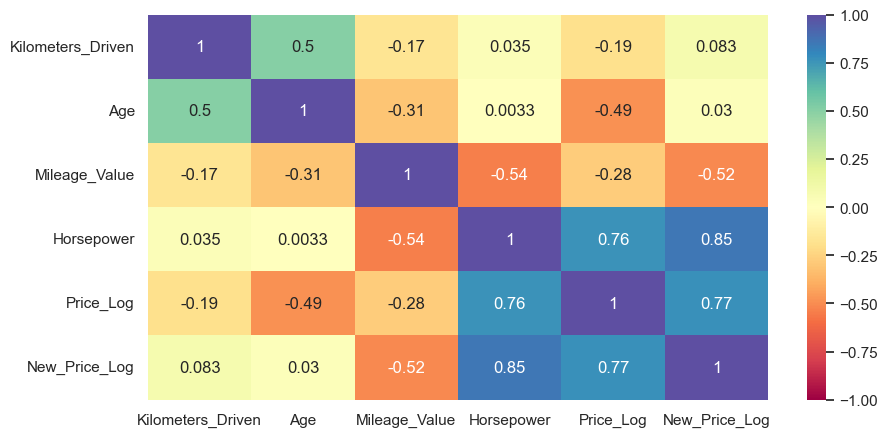

<IPython.core.display.Javascript object>

In [119]:
# The heatmap will give us a correlation matrix of our numeric data
plt.figure(figsize=(10, 5))
sns.heatmap(cars_model.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.show()

What we're left with here are the strongest correlations that don't overlap substantially. This is a relatively lean dataset. Some noteable observations here:
* `Age` gives us a much easier value to work with than year, which is time-based. 
* I had high hopes for the kilometers/year value, but it turns out we seem to get a stronger signal from just total kilometers driven
* I dropped `Kilometers_Driven_Log` in favor of `Kilometers_Driven`, which seems to show stronger correlations.  The log transformed variables for `Price_Log` and `New_Price_Log` performed better than the originals, so I dropped those
* One strong correlation that surprised me was the `Price_Log` to `Horsepower` correlation.  I didn't expect that.

In [120]:
# enumerate a subset of our numeric values for our pairplot
numeric_vars = [
    "Kilometers_Driven",
    "New_Price_Log",
    "Price_Log",
    "Age",
    "Mileage_Value",
    "Horsepower",
]
# Add Location to breakout the plots by product specific trends

<IPython.core.display.Javascript object>

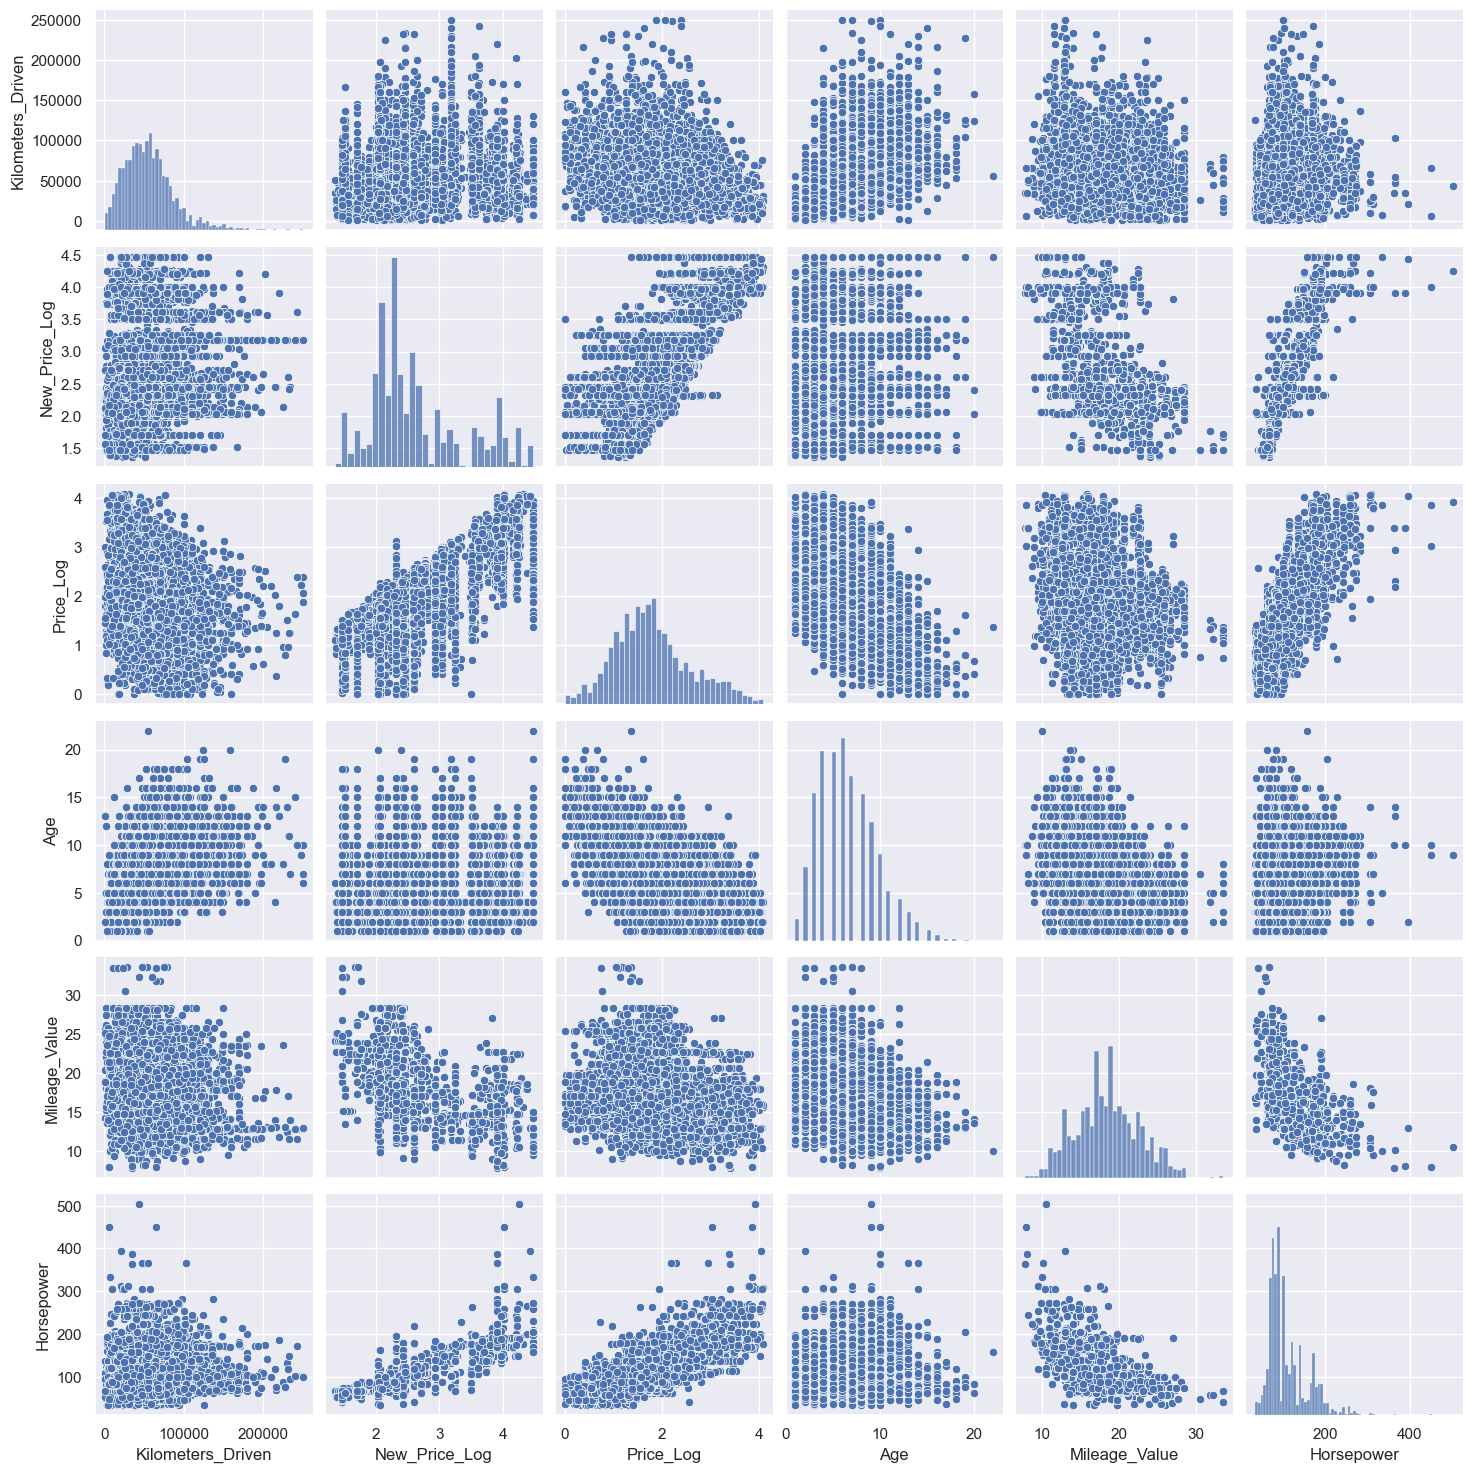

<IPython.core.display.Javascript object>

In [121]:
# Plot our numeric values against each other
sns.pairplot(data=cars_model[numeric_vars], diag_kind="auto")

__Pairplot Observations__

* Positive correlation with `New_Price_Log` and `Horsepower` seems to show a preference and willingness to pay for powerful cars
* Our pricing seems to track with new car pricing - in general, cars seem to hold their value uniformly.  
* Our pricing shows the negative correlation with age, which is what we would expect
* There's a weak negative correlation with price and mileage. I'm reading that as a preference for power over economy
* Again, a strong positive correlation with used car prices and horsepower
* We've previously observed that older cars seem to be less economical
* And less economical cars are more powerful - higher horsepower.

#### Pricing Outliers and Anomalies

Earlier, we noted some outliers in the `New_Price` data, but we were looking across all manufacturers, all models.  As we explore the notion of depreciation in the value of our cars, we need to look at this on a model by model basis. 

In setting this up, I looked very simply at subtracting the `Price` - the used car price - from the `New_Price` and dividing by the age of the cars in years. That should give me the rate at which the car's value declines, right?

What I found was that some of the deltas between new car and used car pricing were negative.  In other words: the used cars were worth more than the new car price. This is possible __if__ the car is a collector's item, and actually appreciates in value.  But - a quick look at other models of this type and the new car pricing uncovered the anomalies.

In [122]:
# build a dataset by model with new price, price, age, and a simple calculation for depreciation per year
car_pricing = cars.groupby(["Manufacturer", "Model"])[
    ["New_Price", "Price", "Age"]
].mean()  # note we're working with mean values here
car_pricing["price_delta"] = car_pricing["New_Price"] - car_pricing["Price"]
car_pricing["annual_depreciation"] = car_pricing["price_delta"] / car_pricing["Age"]

<IPython.core.display.Javascript object>

In [123]:
# Whoops. Negative depreciation for some of our models?
car_pricing["annual_depreciation"].sort_values().head(25)

Manufacturer   Model    
Mercedes-Benz  Slk-Class   -1.284444
Hyundai        Santa       -0.545688
Volkswagen     Beetle      -0.527273
Maruti         S            0.004000
               Grand        0.114828
Mahindra       E            0.145000
Hyundai        Santro       0.224002
Ford           Freestyle    0.248824
Maruti         Eeco         0.259390
               Alto         0.261738
Volkswagen     Jetta        0.279942
Force          One          0.327778
Maruti         Wagon        0.335535
Datsun         Redi-Go      0.361579
Maruti         Celerio      0.375667
Tata           New          0.386250
Maruti         Versa        0.390000
Renault        Kwid         0.392764
Hyundai        Sonata       0.393220
Tata           Sumo         0.400238
               Tiago        0.407222
Volkswagen     Passat       0.409868
Nissan         X-Trail      0.415172
Maruti         Sx4          0.443311
Honda          Brio         0.445573
Name: annual_depreciation, dtype: float64

<IPython.core.display.Javascript object>

We could have outliers in both the new car pricing, and the used car pricing. That is: the used car price could be too high, or the new car price could be too low.

__Assumption: there's always depreciation. The used car price should be lower than the new car price__

I could re-use my earlier brute-force approach, and try to impute missing values from other models of the same type. But before I try that, let's see how many of these anomalies we have:

In [124]:
# Test how many vehicles we have in inventory with obviously erroneous pricing
len(cars.loc[cars["New_Price"] - cars["Price"] < 0])

61

<IPython.core.display.Javascript object>

OK - I think we'll __drop__ these records, and then take another pass at annual depreciation

In [125]:
# drop in place records with pricing errors
cars.drop(cars[cars["New_Price"] - cars["Price"] < 0].index, inplace=True)

<IPython.core.display.Javascript object>

In [126]:
# (re-)build a dataset by model with new price, price, age, and a simple calculation for depreciation per year
car_pricing = cars.groupby(["Manufacturer", "Model"])[
    ["New_Price", "Price", "Age"]
].mean()  # note we're working with mean values here
car_pricing["price_delta"] = car_pricing["New_Price"] - car_pricing["Price"]
car_pricing["annual_depreciation"] = car_pricing["price_delta"] / car_pricing["Age"]

<IPython.core.display.Javascript object>

In [127]:
# This should give us a sorted list of models with the lowest average depreciation per year
# These are cars that hold their value
car_pricing["annual_depreciation"].sort_values().head(25)

Manufacturer  Model    
Maruti        S            0.095385
Mahindra      E            0.145000
Hyundai       Santro       0.224002
              Santa        0.247083
Ford          Freestyle    0.248824
Maruti        Alto         0.262497
              Grand        0.262917
              Eeco         0.268210
              Wagon        0.336019
Datsun        Redi-Go      0.361579
Maruti        Celerio      0.375667
Tata          New          0.386250
Maruti        Versa        0.390000
Renault       Kwid         0.398525
Tata          Sumo         0.400238
Volkswagen    Passat       0.409868
Nissan        X-Trail      0.415172
Tata          Tiago        0.436346
Honda         Brio         0.445573
Volkswagen    Jetta        0.463103
Maruti        Esteem       0.471786
Hyundai       Sonata       0.484906
Tata          Xenon        0.488333
Maruti        Swift        0.496399
              Sx4          0.506370
Name: annual_depreciation, dtype: float64

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Depreciation / Year (Lakh)')

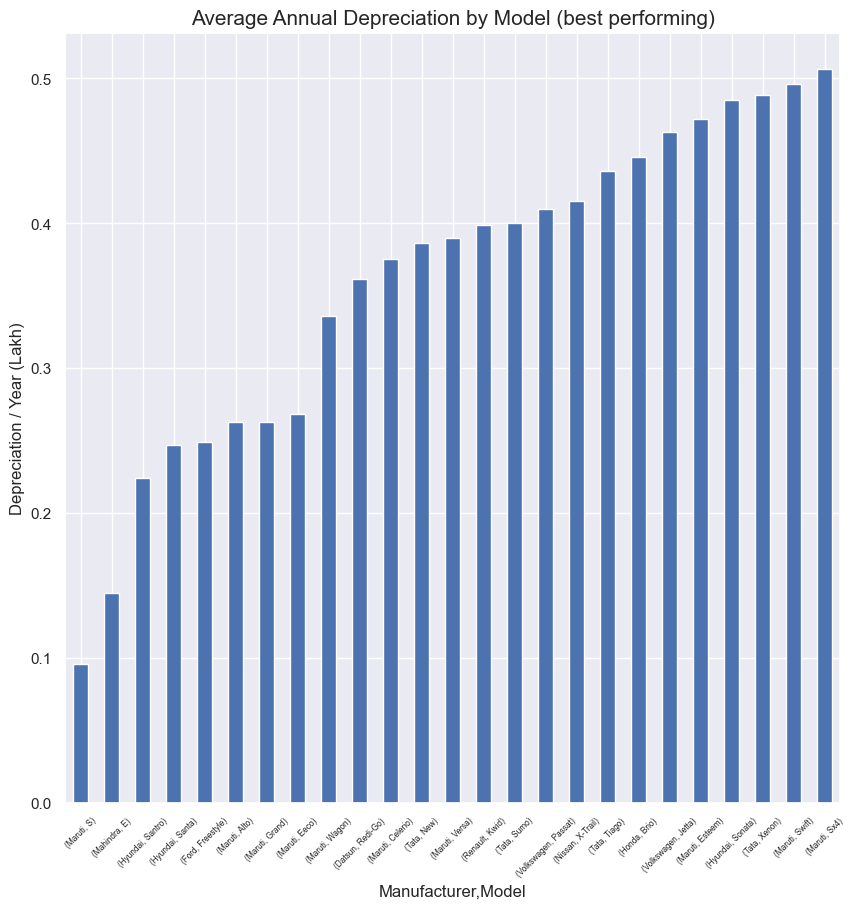

<IPython.core.display.Javascript object>

In [128]:
# Working from our simple calculated depreciation, these cars hold their value best
df = car_pricing["annual_depreciation"]
ax = df.sort_values(ascending=True).head(25).plot.bar()
plt.title("Average Annual Depreciation by Model (best performing)", fontsize=15)
plt.xticks(rotation=45, fontsize=6)
ax.set_ylabel("Depreciation / Year (Lakh)")

Text(0, 0.5, 'Depreciation / Year (Lakh)')

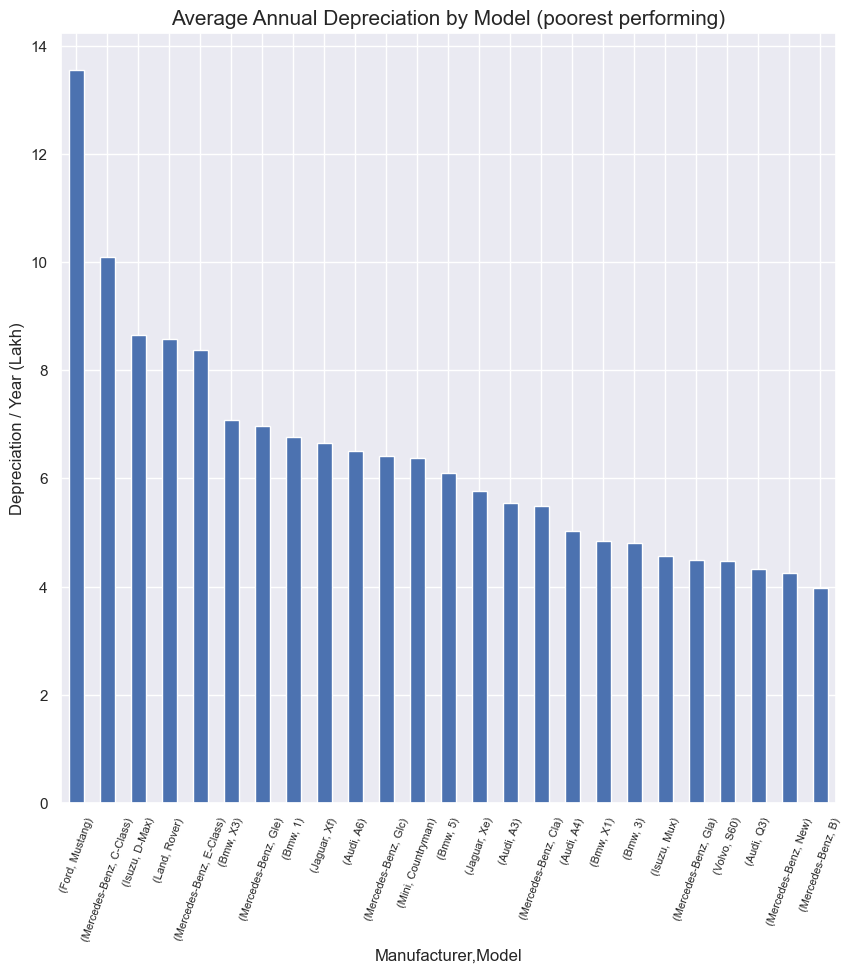

<IPython.core.display.Javascript object>

In [129]:
# Working from our simple calculated depreciation, these cars lose value the fastest
df = car_pricing["annual_depreciation"]
ax = df.sort_values(ascending=False).head(25).plot.bar()
plt.title("Average Annual Depreciation by Model (poorest performing)", fontsize=15)
plt.xticks(rotation=70, fontsize=8)
ax.set_ylabel("Depreciation / Year (Lakh)")

OK. This looks like a more reasonable relationship between new car pricing and used car pricing, and these look like reasonable annual depreciation rates.  We'll use this to make a recommendation to the business about which models are the most profitable to acquire and maintain in inventory.  The collollary here is that the bottom of this list - models with the largest depreciation - represent inventory we want to get rid of.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

I think we've addressed all of these inline, throughout the course of the exploration and visualization. Please note if you see anything I've missed.

In [130]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5694.0,2013.417281,3.106702,1998.000000,2012.000000,2014.000000,2016.000000,2019.000000
Kilometers_Driven,5694.0,56947.466456,32877.485594,1001.000000,34000.000000,53000.000000,72480.750000,250000.000000
Seats,5694.0,5.278714,0.782368,2.000000,5.000000,5.000000,5.000000,10.000000
New_Price,5694.0,19.050329,17.842068,3.910000,7.880000,11.300000,19.270000,87.570000
Price,5694.0,8.493681,8.546517,1.000000,3.500000,5.500000,9.250000,59.720000
Age,5694.0,6.582719,3.106702,1.000000,4.000000,6.000000,8.000000,22.000000
KM_Year,5694.0,9460.135406,5466.777023,97.000000,5866.000000,8333.500000,11790.000000,56251.000000
Owners,5694.0,1.194766,0.445325,1.000000,1.000000,1.000000,1.000000,4.000000
Mileage_Value,5694.0,18.492092,4.089771,7.810000,15.707500,18.500000,21.100000,33.540000
Engine_Displacement,5694.0,1586.063224,548.310797,72.000000,1197.000000,1461.000000,1968.000000,5461.000000


<IPython.core.display.Javascript object>

## Model Building - Linear Regression

### Model Performance Check

In [131]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

### "Lean" dataset

In [132]:
# Copy, and trim data as required
cars_lean = cars.copy()
cars_lean.drop(["S.No."], axis=1, inplace=True)
cars_lean.drop(["Year"], axis=1, inplace=True)
cars_lean.drop(["Seats"], axis=1, inplace=True)
cars_lean.drop(["KM_Year"], axis=1, inplace=True)
cars_lean.drop(["Owners"], axis=1, inplace=True)
cars_lean.drop(["Price_Log"], axis=1, inplace=True)
cars_lean.drop(["New_Price_Log"], axis=1, inplace=True)
cars_lean.drop(["Kilometers_Driven_Log"], axis=1, inplace=True)
cars_lean.drop(["Engine_Displacement"], axis=1, inplace=True)
cars_lean.drop(["Manufacturer"], axis=1, inplace=True)
cars_lean.drop(["Model"], axis=1, inplace=True)
cars_lean.drop(["Location"], axis=1, inplace=True)
# cars_lean.drop(["Transmission"], axis=1, inplace=True)
# cars_lean.drop(["Fuel_Type"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [133]:
# Drop our dependent variable
X = cars_lean.drop(["Price"], axis=1)
y = cars_lean["Price"]

<IPython.core.display.Javascript object>

In [134]:
X.head()

,Kilometers_Driven,Fuel_Type,Transmission,New_Price,Age,Mileage_Value,Horsepower
0,72000,CNG,Manual,5.51,10,26.60,58.16
1,41000,Diesel,Manual,16.06,5,19.67,126.20
2,46000,Petrol,Manual,8.61,9,18.20,88.70
3,87000,Diesel,Manual,11.27,8,20.77,88.76
4,40670,Diesel,Automatic,53.14,7,15.20,140.80


<IPython.core.display.Javascript object>

In [135]:
X.shape

(5694, 7)

<IPython.core.display.Javascript object>

In [136]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,Kilometers_Driven,New_Price,Age,Mileage_Value,Horsepower,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,72000,5.51,10,26.60,58.16,0,0,0,0,1
1,41000,16.06,5,19.67,126.20,1,0,0,0,1
2,46000,8.61,9,18.20,88.70,0,0,0,1,1
3,87000,11.27,8,20.77,88.76,1,0,0,0,1
4,40670,53.14,7,15.20,140.80,1,0,0,0,0


<IPython.core.display.Javascript object>

#### Split into Train and Test

In [137]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [138]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 3985
Number of rows in test data = 1709


<IPython.core.display.Javascript object>

#### Fit model

In [139]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [140]:
x_train.shape

(3985, 10)

<IPython.core.display.Javascript object>

#### Model Performance

In [141]:
# Checking model performance on train set
print("\nTraining Performance")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf


Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.102442,2.534387,0.772027,0.771454,46.810011


<IPython.core.display.Javascript object>

In [142]:
# Checking model performance on test set
print("\nTest Performance")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf


Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.846596,2.393425,0.79204,0.790816,46.295724


<IPython.core.display.Javascript object>

## **Observations**

- The train and test $R^2$ are 0.77 and 0.79, indicating that the model explains 77% and 79% of the total variation in the train and test sets respectively. Both scores are comparable. That's a reasonably good result.

- RMSE values on the train and test sets are reasonably close, but this can be measured against the range of the dependent variable (pricing). By that standard, it's relatively large.

- This model is not overfitting, but it's extremely lean in terms of the variables it includes.

- MAE indicates that our current model is able to predict pricing within a mean error of 2.39. This looks pretty good.

- MAPE of 46.29 on the test data means that we are able to predict within 46% of the pricing value. That's not great.


### Best Results

In [143]:
# Copy, and trim data as required
cars_lean = cars.copy()
cars_lean.drop(["S.No."], axis=1, inplace=True)
cars_lean.drop(["Year"], axis=1, inplace=True)
cars_lean.drop(["KM_Year"], axis=1, inplace=True)
cars_lean.drop(["Owners"], axis=1, inplace=True)
cars_lean.drop(["Engine_Displacement"], axis=1, inplace=True)
cars_lean.drop(["Price_Log"], axis=1, inplace=True)
cars_lean.drop(["New_Price_Log"], axis=1, inplace=True)
cars_lean.drop(["Kilometers_Driven_Log"], axis=1, inplace=True)
cars_lean.drop(["Mileage_Value"], axis=1, inplace=True)
cars_lean.drop(["Model"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [144]:
# Drop our dependent variable
X = cars_lean.drop(["Price"], axis=1)
y = cars_lean["Price"]

<IPython.core.display.Javascript object>

In [145]:
X.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Seats,New_Price,Manufacturer,Age,Horsepower
0,Mumbai,72000,CNG,Manual,5.0,5.51,Maruti,10,58.16
1,Pune,41000,Diesel,Manual,5.0,16.06,Hyundai,5,126.20
2,Chennai,46000,Petrol,Manual,5.0,8.61,Honda,9,88.70
3,Chennai,87000,Diesel,Manual,7.0,11.27,Maruti,8,88.76
4,Coimbatore,40670,Diesel,Automatic,5.0,53.14,Audi,7,140.80


<IPython.core.display.Javascript object>

In [146]:
X.shape

(5694, 9)

<IPython.core.display.Javascript object>

In [147]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,Kilometers_Driven,Seats,New_Price,Age,Horsepower,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Manufacturer_Audi,Manufacturer_Bmw,Manufacturer_Chevrolet,Manufacturer_Datsun,Manufacturer_Fiat,Manufacturer_Force,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,Manufacturer_Isuzu,Manufacturer_Jaguar,Manufacturer_Jeep,Manufacturer_Land,Manufacturer_Mahindra,Manufacturer_Maruti,Manufacturer_Mercedes-Benz,Manufacturer_Mini,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,72000,5.0,5.51,10,58.16,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,41000,5.0,16.06,5,126.20,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46000,5.0,8.61,9,88.70,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,87000,7.0,11.27,8,88.76,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,40670,5.0,53.14,7,140.80,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [148]:
X.shape

(5694, 46)

<IPython.core.display.Javascript object>

#### Split into Train and Test

In [149]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [150]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 3985
Number of rows in test data = 1709


<IPython.core.display.Javascript object>

#### Fit Model

In [151]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [152]:
x_train.shape

(3985, 46)

<IPython.core.display.Javascript object>

#### Model Performance

In [153]:
# Checking model performance on train set
print("\nTraining Performance")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf


Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.751455,2.262096,0.809367,0.807141,41.619897


<IPython.core.display.Javascript object>

In [154]:
# Checking model performance on test set
print("\nTest Performance")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf


Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.490924,2.123608,0.82872,0.823979,40.966168


<IPython.core.display.Javascript object>

## __Observations__
The train and test  𝑅2
  are 0.809 and 0.828, indicating that the model explains 81% and 83% of the total variation in the train and test sets respectively. Both scores are comparable. That's a reasonably good result.

RMSE values on the train and test sets are reasonably close, but this can be measured against the range of the dependent variable (pricing). By that standard, it's relatively large.

This model is not overfitting.

MAE indicates that our current model is able to predict pricing within a mean error of 2.12. This looks pretty good.

MAPE of 40.96 on the test data means that we are able to predict within 41% of the pricing value. That's not great.

## Residuals Analysis

In [155]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

<IPython.core.display.Javascript object>

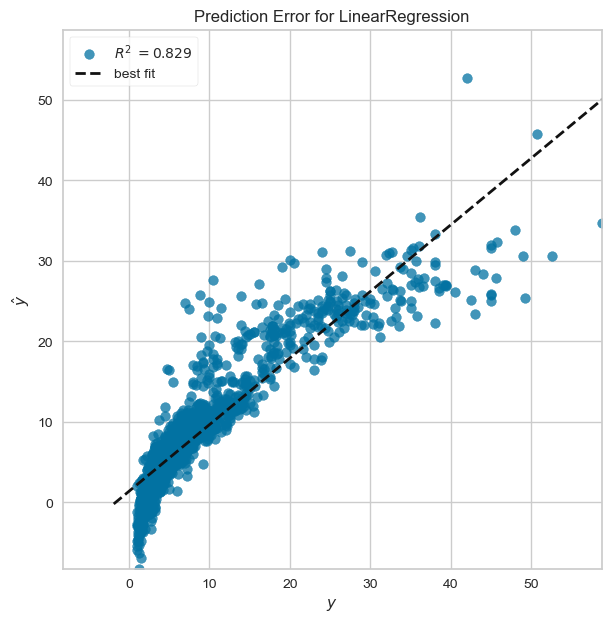

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

<IPython.core.display.Javascript object>

In [156]:
visualizer = PredictionError(lin_reg_model, size=(700, 700), identity=False)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Forward Feature Selector

I thought I would go ahead and try to set up and run the SFS comparison, and see if I could improve the test results any. If I understand correctly, the best use of SFS is going to be to reduce the model complexity and processing overhead, and - unless the model is already overfitted - it's probably not going to produce any better results. It should just help you figure out where the cutoff is for useful features.

At any rate - it was interesting to set up and try out!

In [157]:
import joblib
import sys

sys.modules["sklearn.externals.joblib"] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

<IPython.core.display.Javascript object>

In [158]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=4,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5,
)


<IPython.core.display.Javascript object>

In [159]:
# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  46 out of  46 | elapsed:    1.4s finished

[2023-03-24 19:04:55] Features: 1/46 -- score: 0.6017188188819395[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 out of  45 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished

[2023-03-24 19:04:55] Features: 2/46 -- score: 0.7308152648014112[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  44 out of  44 | elapsed:    0.0s finished

[2023-03-24 19:04:55] Features: 3/46 -- score: 0.7618934999303515[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  43 out of  43 | elapsed:    0.0s finished

[2023-03-24 19:04:55] Features: 4/46 -- score: 0.7678084853962892[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished

[2023-03-24 19:05:02] Features: 37/46 -- score: 0.8044683855195192[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   7 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:    0.0s finished

[2023-03-24 19:05:02] Features: 38/46 -- score: 0.804448944166323[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-03-24 19:05:02] Features: 39/46 -- score: 0.8044232604486454[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-03-24 19:05:02] Features: 40/46 -- score: 0.8044

<IPython.core.display.Javascript object>

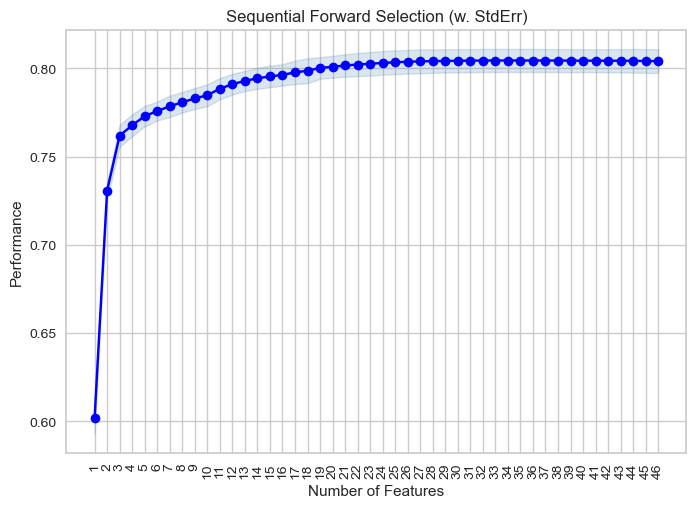

<IPython.core.display.Javascript object>

In [160]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err")
plt.rcParams["figure.figsize"] = (60, 50)
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

In [161]:
sfs.subsets_[2]

{'feature_idx': (2, 3),
 'cv_scores': array([0.73615237, 0.74575609, 0.72010439, 0.72904521, 0.72301825]),
 'avg_score': 0.7308152648014112,
 'feature_names': ('New_Price', 'Age')}

<IPython.core.display.Javascript object>

In [162]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.6141425032561058, 0.6227744938945778, 0.573...",0.601719,"(New_Price,)",0.022657,0.017628,0.008814
2,"(2, 3)","[0.7361523718112821, 0.7457560949447197, 0.720...",0.730815,"(New_Price, Age)",0.011924,0.009278,0.004639
3,"(2, 3, 4)","[0.7716581974266645, 0.7776873617499561, 0.747...",0.761893,"(New_Price, Age, Horsepower)",0.016032,0.012473,0.006237
4,"(2, 3, 4, 32)","[0.7841054584683176, 0.7776037690348273, 0.748...",0.767808,"(New_Price, Age, Horsepower, Manufacturer_Land)",0.015997,0.012446,0.006223
5,"(2, 3, 4, 32, 36)","[0.792209031136684, 0.7767918366787928, 0.7570...",0.772908,"(New_Price, Age, Horsepower, Manufacturer_Land...",0.014924,0.011611,0.005806
6,"(2, 3, 4, 9, 32, 36)","[0.7938423973863848, 0.780418326989163, 0.7619...",0.775886,"(New_Price, Age, Horsepower, Location_Hyderaba...",0.013808,0.010743,0.005371
7,"(2, 3, 4, 7, 9, 32, 36)","[0.7991126914390125, 0.7832053032734314, 0.763...",0.778527,"(New_Price, Age, Horsepower, Location_Coimbato...",0.015502,0.012061,0.006031
8,"(2, 3, 4, 5, 7, 9, 32, 36)","[0.8015211125219828, 0.7836062948019231, 0.766...",0.78086,"(New_Price, Age, Horsepower, Location_Bangalor...",0.015008,0.011677,0.005838
9,"(2, 3, 4, 5, 7, 9, 32, 34, 36)","[0.8034375127482406, 0.7864291822227185, 0.768...",0.782976,"(New_Price, Age, Horsepower, Location_Bangalor...",0.015171,0.011803,0.005902
10,"(2, 3, 4, 5, 7, 9, 18, 32, 34, 36)","[0.806799720167104, 0.7880048615907129, 0.7713...",0.784835,"(New_Price, Age, Horsepower, Location_Bangalor...",0.015941,0.012403,0.006201


<IPython.core.display.Javascript object>

In [163]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=26,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=4,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  46 out of  46 | elapsed:    1.4s finished

[2023-03-24 19:05:28] Features: 1/26 -- score: 0.6017188188819395[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished

[2023-03-24 19:05:28] Features: 2/26 -- score: 0.7308152648014112[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  37 out of  44 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  44 out of  44 | elapsed:    0.0s finished

[2023-03-24 19:05:28] Features: 3/26 -- score: 0.7618934999303515[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 out of  43 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  43 out of  43 | elapsed:    0.0s finished

[2023-03-24 19:05:29] Features: 4/26 -- score: 0.767808485396

<IPython.core.display.Javascript object>

In [164]:
# Select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 18, 19, 20, 21, 26, 28, 30, 31, 32, 34, 35, 36, 40, 43]


<IPython.core.display.Javascript object>

In [165]:
# List the names of the important features
x_train.columns[feat_cols]

Index(['Kilometers_Driven', 'Seats', 'New_Price', 'Age', 'Horsepower',
       'Location_Bangalore', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Manufacturer_Audi', 'Manufacturer_Bmw', 'Manufacturer_Ford',
       'Manufacturer_Hyundai', 'Manufacturer_Jaguar', 'Manufacturer_Jeep',
       'Manufacturer_Land', 'Manufacturer_Maruti',
       'Manufacturer_Mercedes-Benz', 'Manufacturer_Mini', 'Manufacturer_Skoda',
       'Manufacturer_Toyota'],
      dtype='object')

<IPython.core.display.Javascript object>

In [166]:
x_train_final = x_train[x_train.columns[feat_cols]]

<IPython.core.display.Javascript object>

In [167]:
# Creating new x_test with the same variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

<IPython.core.display.Javascript object>

In [168]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)


LinearRegression()

<IPython.core.display.Javascript object>

In [169]:
# model performance on train set
print("\nTraining Performance")
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train
)
lin_reg_model2_train_perf


Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.771176,2.275535,0.807358,0.806092,41.683573


<IPython.core.display.Javascript object>

In [170]:
# model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test
)
lin_reg_model2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.518375,2.130858,0.826016,0.823326,40.600963


<IPython.core.display.Javascript object>

In [171]:
models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,3.751455,3.771176
MAE,2.262096,2.275535
R-squared,0.809367,0.807358
Adj. R-squared,0.807141,0.806092
MAPE,41.619897,41.683573


<IPython.core.display.Javascript object>

### Model Performance Comparison

In [172]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,3.490924,3.518375
MAE,2.123608,2.130858
R-squared,0.828720,0.826016
Adj. R-squared,0.823979,0.823326
MAPE,40.966168,40.600963


<IPython.core.display.Javascript object>

## Actionable Insights and Recommendations 

#### Age of Inventory
  * Steps 81 through 83 in the notebook shows us the distribution of the ages our inventory. 25% of our vehicles are over 8 years old (approximately 1400), and they make up 14% of our inventory.
  * __Recommendation__: Prioritize moving out older vehicles from inventory, and make room for vehicles in the 4-7 year old range.

#### Best Performing Vehicles
  * In step 128, you see the vehicles with the lowest annual depreciation. These are models that hold their value best over time, and can offer a resale price that is the closest to their original price. Likewise, in step 129, you can see a graph of the vehicles with the steepest depreciation per year.  These are vehicles you should be wary of acquiring, and should move quickly. 
  * __Recommendation__: Prioritize acquiring and maintaining an inventory of low-depreciation vehicles. Be cautious about acquiring the poorest performing vehicles with regard to depreciation - even if they are high-end cars.

#### Match Location with Fuel Type 
  * In step 97, you can see a breakdown of fuel types for the vehicles in inventory. The Indian market can greater diversity in fuel types than is found in Europe or the US. About 52% of inventory is diesel, and 45.9% is petrol. 
  * __Recommendation__: Based on market survey, match the fuel types of the vehicles with local preferences, availability, and pricing. Move LPG and CNG vehicles to areas where those fuels are available and less expensive.  CNG vehicles, in particular, offer excellent fuel economy; market this as a differentiator and price accordingly.

#### Most Profitable Locations
  * In steps 112 and 113 you can visualize where our inventory is located. Our retail lots are widely distributed throughout India. Moving vehicles between locations is expense and time-consuming. 
  * That said, in step 114 you can see the locations with the highest average pricing ranked in order. These are the markets that command the highest prices.
  * __Recommendation__: Analyze the sales data for the top three locations by average price (Coimbatore, Bangalore, and Kochi) and look for trends that accelerate sales and reach interested buyers in those markets. Leverage what we learn for other locations over time, to drive up average pricing in our other markets.

#### Predictive Model
  * __Recommendation__: Use the "Best Results" model; results are shown in step 154

___